### Fake News Detection Project ------ Group 6


# PRAT 1. Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk as nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import warnings 
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
!wget 'https://drive.google.com/uc?id=128KyQ9W3grRIJKuM-E6UcBpNuyGAbYEJ' -O fake_or_real_news.csv

--2022-05-31 09:17:56--  https://drive.google.com/uc?id=128KyQ9W3grRIJKuM-E6UcBpNuyGAbYEJ
Resolving drive.google.com (drive.google.com)... 108.177.125.138, 108.177.125.139, 108.177.125.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jt8gdmdptm2do0vvcikcvuuhnv1b0k0s/1653988650000/15662073033630342242/*/128KyQ9W3grRIJKuM-E6UcBpNuyGAbYEJ [following]
--2022-05-31 09:17:57--  https://doc-08-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jt8gdmdptm2do0vvcikcvuuhnv1b0k0s/1653988650000/15662073033630342242/*/128KyQ9W3grRIJKuM-E6UcBpNuyGAbYEJ
Resolving doc-08-3k-docs.googleusercontent.com (doc-08-3k-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-08-3k-docs.googleusercontent.com (doc-08-3k-docs.googleusercontent.com)|142.250.1

In [3]:
df=pd.read_csv('fake_or_real_news.csv',index_col=[0])
df.head()

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
875    It's primary day in New York and front-runners...  REAL

In [4]:
# checking the number of rows and columns
df.shape

(6335, 3)

In [5]:
df['text_length'] = df['text'].apply(lambda x:len(x.split()))
df['title_length'] =df['title'].apply(lambda x:len(x.split()))
df.head()

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  text_length  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE         1296   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE          446   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL          431   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE          404   
875    It's primary day in New York and front-runners...  REAL          317   

       title_length  
8476              5  
10294            14  
3608              9  
10142            15  
875               9

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 8476 to 4330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6335 non-null   object
 1   text          6335 non-null   object
 2   label         6335 non-null   object
 3   text_length   6335 non-null   int64 
 4   title_length  6335 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.0+ KB


## 1.1 Delete Duplicates

In [7]:
# checking for duplicate instances
duplicates=df.duplicated().sum()
print(duplicates)
# dropping the duplicate values
df.drop_duplicates(inplace=True)

29


## 1.2 Delete Missing values

In [8]:
print("rows contain missing values",df[df['text_length']==0].count()[0])
df[df['text_length']==0].count()[0]/df.shape[0]
#empyty texts are in low proportion,so we drop the rows with empty text

rows contain missing values 36


0.005708848715509039

In [9]:
df.drop(df[df['text_length']==0].index, inplace = True)

In [10]:
df[df['title_length']==0].head()
#no empty title

Empty DataFrame
Columns: [title, text, label, text_length, title_length]
Index: []

In [11]:
df.head()

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  text_length  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE         1296   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE          446   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL          431   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE          404   
875    It's primary day in New York and front-runners...  REAL          317   

       title_length  
8476              5  
10294            14  
3608              9  
10142            15  
875               9

In [12]:
df.shape

(6270, 5)

## 1.3 Observe extreme values

### 1.3.1 For text

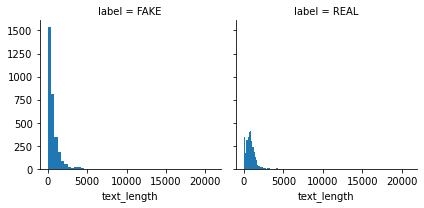

In [13]:
g = sns.FacetGrid(data = df, col = 'label')
g.map(plt.hist, 'text_length', bins = 50)
#we can see that the data is significantly right skewed!

In [14]:
#show the rows with words less than 10
print((df[df['text_length']<= 10].count() / df['text_length'].count())[0])
df[df['text_length']<= 10]

0.004784688995215311


title  \
2832   Obama, sounding like his critics, admits no 'c...   
10357  Hillary IMPLODES: Trump 'Took Everything...Pai...   
5445   Steve Quayle On Economic Collapse, World War 3...   
5329                     Babylon Mystery Religion Series   
2877      White House, Dems seek to water down Iran bill   
6547   John Oliver’s Smear Tactics Exposed As Establi...   
10329  High Court Judges looking for a Truss to suppo...   
2650                   Lynch's delayed confirmation vote   
728                        Bernie's not-so-secret-weapon   
3325   Clinton emails on trade deal held until after ...   
9799   WORLD WAR 3 Hillary Clinton Foundation Holocau...   
2825              Does Kerry want an Iran deal too much?   
160     How Congress finally killed No Child Left Behind   
7046   BUILD UP WW3 World War 3 Is Coming Current Sit...   
2623              7 Times Obama Failed to Support Israel   
8751                   2009 FLASHBACK: “What If” Remixed   
169     Ryan and McConnell confront their first big test   
9731             Easy Street Recent Used Vinyl Arrivals!   
6647   WORLD WAR 3 is Now * HILLARY Clinton Is Mushro...   
8942   The Arrivals Bosanski Prijevod 36-theStoryOfJesus   
10452  US Election an elaborate John Lewis Christmas ...   
9368   2016 latest: Spirit of Christmas to be replace...   
6840   EndingFed News Network | Syndicated news and o...   
8825                    Anonymous World War 3 Has Begun!   
7300                                      Tom Hanks Raps   
8889                               WORLD WAR 3 IS COMING   
6747   Joel Skousen on Scenario World War 3 NWO 2016 ...   
6108              The Dark Art of Political Intimidation   
2830   Ayatollah's decree complicates Iran nuclear talks   
8253               The U.S. National Bird Is Now a Drone   

                                                    text label  text_length  \
2832   The online comment fits closely with his campa...  REAL            9   
10357      Hillary Clinton can’t believe she’s losing.    FAKE            6   
5445   source Add To The Conversation Using Facebook ...  FAKE            8   
5329   Part 1 BABYLON "SUN WORSHIP" https://www.youtu...  FAKE            6   
2877   The online comment fits closely with his campa...  REAL            9   
6547   John Oliver’s Smear Tactics Exposed As Establi...  FAKE            8   
10329         Posted: Nov 6th, 2016 by MADJEZ   MADJEZ    FAKE            7   
2650   The last-ditch effort to stop Donald Trump is ...  REAL           10   
728    But he still takes some time out for Twitter f...  REAL           10   
3325   Clinton emails on trade deal held until after ...  REAL            9   
9799   source Add To The Conversation Using Facebook ...  FAKE            8   
2825   The online comment fits closely with his campa...  REAL            9   
160    Parker covered the Trump campaign and transiti...  REAL           10   
7046   source Add To The Conversation Using Facebook ...  FAKE            8   
2623         Should the U.S. Continue to Support Israel?  REAL            7   
8751                                        11/08/2016    FAKE            1   
169    Parker covered the Trump campaign and transiti...  REAL           10   
9731   Support Us Easy Street Recent Used Vinyl Arriv...  FAKE            8   
6647   source Add To The Conversation Using Facebook ...  FAKE            8   
8942   Support Us The Arrivals Bosanski Prijevod 36-t...  FAKE            7   
10452                Adrian Bamforth   Adrian Bamforth    FAKE            4   
9368                                     Guest   Guest    FAKE            2   
6840                                       RECENT POSTS   FAKE            2   
8825   source Add To The Conversation Using Facebook ...  FAKE            8   
7300                  Gary North has the video . 12:56    FAKE            7   
8889   source Add To The Conversation Using Facebook ...  FAKE            8   
6747   source Add To The Conversation Using Facebook ... 

### 1.3.2 For title

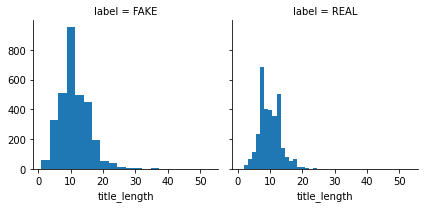

In [15]:
g = sns.FacetGrid(data = df, col = 'label')
g.map(plt.hist, 'title_length', bins = 20)

In [16]:
#show the rows with words less than 3
df[df['title_length']<=3]

title  \
6903                       Tehran, USA   
7680          Nuclear weapons question   
8685               Glorifying Violence   
6408                          Trumped!   
8756                         Tweetwave   
...                                ...   
6782                         Wikileaks   
4839      The no-transparency election   
7721   THE CLINTON/VATICAN/TEHRAN AXIS   
10100                   Andrew Maguire   
2561         Cruz's immigration gambit   

                                                    text label  text_length  \
6903     \nI’m not an immigrant, but my grandparents ...  FAKE         2346   
7680   Report Copyright Violation nuclear weapons que...  FAKE          485   
8685   opednews.com - Advertisement - The news in the...  FAKE          353   
6408   Finally, the political revolt we’ve all been w...  FAKE           17   
8756   This time it's true no pantsTweetwave More Of ...  FAKE         4279   
...                                                  ...   ...          ...   
6782   Whales, elephants of the deep with fins the si...  FAKE          167   
4839   (CNN) The 2016 election is setting new lows fo...  REAL         1564   
7721   Robert Spencer \nBreitbart reported Saturday t...  FAKE          337   
10100  140230 Views November 12, 2016 BROADCAST King ...  FAKE         1160   
2561   During the campaign, Trump had threatened to i...  REAL           19   

       title_length  
6903              2  
7680              3  
8685              2  
6408              1  
8756              1  
...             ...  
6782              1  
4839              3  
7721              3  
10100             2  
2561              3  

[80 rows x 5 columns]

In [17]:
#show the rows with words more than 30
df[df['title_length']>=30]

title  \
7892  Comment on Breaking: CDC Blocks Testimony of T...   
6329  Muslims regularly use “Inshallah” (“God Willin...   
5939  Comment on The Science is “Overwhelming At Thi...   
7560  Comment on ‘Voting Is Rigged & Used To Pacify ...   
5420  12 and 63-minute videos: Donald Trump connects...   
7769  Comment on Canadian Air Force Pilot Snaps A Pi...   
6031  Comment on Hillary Clinton failed to disclose ...   
9064  Life: If You Love Enamel Pins, You’ll Love Thi...   
8341  Comment on Shocking Insinuation About Carl Sag...   
6321  Queen Elizabeth II owns every dolphin in Brita...   
6636  Comment on 10 More Beautiful Images That Remin...   
8463  Comment on Are We About To See One Of The Grea...   
5729  Comment on 500 Year Old Map Was Discovered Tha...   
8542  Comment on Invention Secrecy At All-Time High:...   
7772  Comment on 5 Corporations Own The U.S. Media –...   

                                                   text label  text_length  \
7892    Have you heard of Dr. William Thompson? If y...  FAKE          919   
6329  BNI Store Nov 5 2016 Muslims regularly use “In...  FAKE          665   
5939    This ordinance is a big step forwards by cre...  FAKE         2513   
7560  Share on Facebook Share on Twitter “This is th...  FAKE         1360   
5420  Posted on November 7, 2016 by Carl Herman \nJo...  FAKE         1421   
7769  Share on Facebook Share on Twitter “If it does...  FAKE         1077   
6031    DCG | 2 Comments \nRules are for little peop...  FAKE          730   
9064  Email If you can’t get enough enamel pins, the...  FAKE          375   
8341  Share on Facebook Share on Twitter A few years...  FAKE         3009   
6321  Email \nQueen Elizabeth II is not like you and...  FAKE         2887   
6636  Share on Facebook Share on Twitter It seems so...  FAKE          666   
8463  Share on Facebook Share on Twitter I believe w...  FAKE          683   
5729  Share on Facebook Share on Twitter Human histo...  FAKE         1173   
8542  Share on Facebook Share on Twitter Government ...  FAKE         1448   
7772    From the day we are born into this world, we...  FAKE         4182   

      title_length  
7892            35  
6329            30  
5939            34  
7560            38  
5420            35  
7769            32  
6031            42  
9064            53  
8341            32  
6321            30  
6636            41  
8463            30  
5729            30  
8542            34  
7772            35

## 1.4 Stemming and Lemmatization

In [18]:
#Stemming - heuristic process that chops off the ends of words in the hope of achieving this goal correctly
#Lemmatization - with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only, to return the base or dictionary form of a word
#To keep the original meaning of words, we choose lemmatization as our method to proceed data

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        #tag = tag[0].lower()
        if tag.startswith('N'):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('V'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('J'):
            yield wnl.lemmatize(word, pos='a')
        elif tag.startswith('R'):
            yield wnl.lemmatize(word, pos='r')
        else:
            yield word

In [21]:
df.title.loc[10142]

"Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'"

Sample Only

In [22]:
#Sample:
s1 = 'I went to school'
s2= 'I ate food'
s3='This sentence involves some horsing around'

#s4 and s6 extracted from database
#s4 is grammarly wrong, so transformed to s5. We can see the difference later
s4='2016 Republican race enters a new , volatile phase'
s5='In 2016, Republican race enters a new , volatile phase'
s6=df.title.loc[10142]

sentence=pd.DataFrame({'text':[s1,s2,s3,s4,s5,s6]})
sentence

text
0                                   I went to school
1                                         I ate food
2         This sentence involves some horsing around
3  2016 Republican race enters a new , volatile p...
4  In 2016, Republican race enters a new , volati...
5  Bernie supporters on Twitter erupt in anger ag...

In [23]:
test1 = []
for i in range(0, len(sentence)):
    test1.append(' '.join(lemmatize_all(sentence['text'][i])))
c ={'title':test1}
test_df = pd.DataFrame(c)
test_df

#index=3 entry: 'enters' didn't transform as 'enter'
#because lemmatization would not transform the words in the grammarly wrong sentence

title
0                                     I go to school
1                                         I eat food
2          This sentence involve some horsing around
3  2016 Republican race enters a new , volatile p...
4  In 2016 , Republican race enter a new , volati...
5  Bernie supporter on Twitter erupt in anger aga...

In [24]:
wnl = WordNetLemmatizer()
wnl.lemmatize('enters')
#'enters' is default as n!

#So, the success of lemmatization is based on a grammarly correct sentence 

'enters'

### 1.4.1 Lemmatization on Title

In [25]:
title=df['title'].to_frame()
title

title
8476                        You Can Smell Hillary’s Fear
10294  Watch The Exact Moment Paul Ryan Committed Pol...
3608         Kerry to go to Paris in gesture of sympathy
10142  Bernie supporters on Twitter erupt in anger ag...
875     The Battle of New York: Why This Primary Matters
...                                                  ...
4490   State Department says it can't find emails fro...
8062   The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622   Anti-Trump Protesters Are Tools of the Oligarc...
4021   In Ethiopia, Obama seeks progress on peace, se...
4330   Jeb Bush Is Suddenly Attacking Trump. Here's W...

[6270 rows x 1 columns]

In [26]:
title.index = range(len(title))
title

title
0                          You Can Smell Hillary’s Fear
1     Watch The Exact Moment Paul Ryan Committed Pol...
2           Kerry to go to Paris in gesture of sympathy
3     Bernie supporters on Twitter erupt in anger ag...
4      The Battle of New York: Why This Primary Matters
...                                                 ...
6265  State Department says it can't find emails fro...
6266  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6267  Anti-Trump Protesters Are Tools of the Oligarc...
6268  In Ethiopia, Obama seeks progress on peace, se...
6269  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[6270 rows x 1 columns]

In [27]:
title_new = []
for i in range(0, len(title)):
    title_new.append(' '.join(lemmatize_all(title['title'][i])))

t ={'title':title_new}
new_title = pd.DataFrame(t)
new_title

title
0                        You Can Smell Hillary ’ s Fear
1     Watch The Exact Moment Paul Ryan Committed Pol...
2           Kerry to go to Paris in gesture of sympathy
3     Bernie supporter on Twitter erupt in anger aga...
4     The Battle of New York : Why This Primary Matters
...                                                 ...
6265  State Department say it ca n't find emails fro...
6266  The ‘ P ’ in PBS Should Stand for ‘ Plutocrati...
6267  Anti-Trump Protesters Are Tools of the Oligarc...
6268  In Ethiopia , Obama seek progress on peace , s...
6269  Jeb Bush Is Suddenly Attacking Trump . Here 's...

[6270 rows x 1 columns]

### 1.4.2 Lemmatization on Text

In [28]:
text=df['text'].to_frame()
text.index = range(len(text))
text.head()

text
0  Daniel Greenfield, a Shillman Journalism Fello...
1  Google Pinterest Digg Linkedin Reddit Stumbleu...
2  U.S. Secretary of State John F. Kerry said Mon...
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...
4  It's primary day in New York and front-runners...

In [31]:
text_new = []
for i in range(0, len(text)):
    text_new.append(' '.join(lemmatize_all(text['text'][i])))
tx ={'text':text_new}
new_text = pd.DataFrame(tx)
new_text.head()

text
0  Daniel Greenfield , a Shillman Journalism Fell...
1  Google Pinterest Digg Linkedin Reddit Stumbleu...
2  U.S. Secretary of State John F. Kerry say Mond...
3  — Kaydee King ( @ KaydeeKing ) November 9 , 20...
4  It 's primary day in New York and front-runner...

In [32]:
#Combined lemmatized title and text into a dataframe
df.index = range(len(df))
df['title']=new_title['title']
df['text']=new_text['text']
## Use map to convert the 'label' column into a numeric variable; 'Real' as 0, 'Fake' as 1
df['label'] = df['label'].map({'REAL':0, 'FAKE':1})

In [33]:
df.head()

title  \
0                     You Can Smell Hillary ’ s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporter on Twitter erupt in anger aga...   
4  The Battle of New York : Why This Primary Matters   

                                                text  label  text_length  \
0  Daniel Greenfield , a Shillman Journalism Fell...      1         1296   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      1          446   
2  U.S. Secretary of State John F. Kerry say Mond...      0          431   
3  — Kaydee King ( @ KaydeeKing ) November 9 , 20...      1          404   
4  It 's primary day in New York and front-runner...      0          317   

   title_length  
0             5  
1            14  
2             9  
3            15  
4             9

## 1.5 Data Visualization

### 1.5.1 Breif Overview

In [ ]:
#balanced dataset
df['label'].value_counts()  #1 is fake news

0    3154
1    3116
Name: label, dtype: int64

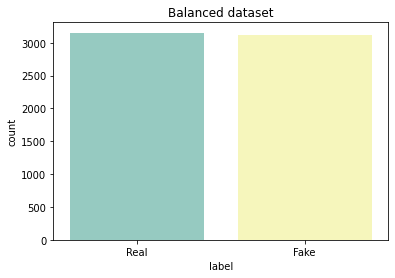

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "label", data = df,palette="Set3")
ax.set_xticklabels(['Real','Fake'],ha="center")
plt.title('Balanced dataset')
plt.show()

In [ ]:
#more extreme values in Fake label
df.groupby('label').describe()

text_length                                                              \
            count        mean         std  min    25%    50%     75%      max   
label                                                                           
0          3154.0  873.703551  723.569130  7.0  450.0  771.0  1123.0   7602.0   
1          3116.0  686.777599  963.157022  1.0  217.0  426.0   835.0  20891.0   

      title_length                                                   
             count       mean       std  min  25%   50%   75%   max  
label                                                                
0           3154.0   9.863348  3.198482  2.0  8.0  10.0  12.0  27.0  
1           3116.0  11.133184  4.560059  1.0  8.0  11.0  13.0  53.0

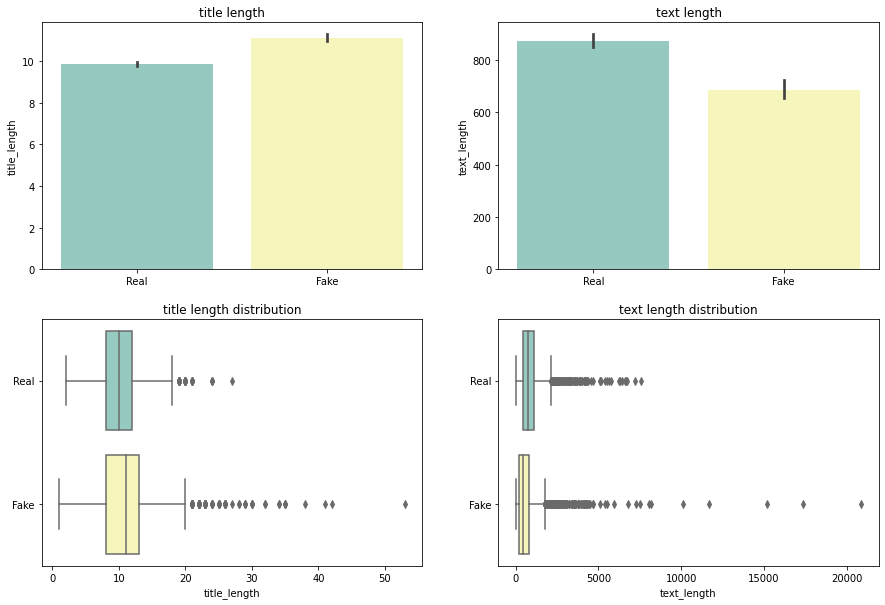

In [ ]:
fig=plt.figure (figsize=(15,10))
axes1=fig.add_subplot(221) 
sns.barplot(x = 'label', y = 'title_length', data = df,palette="Set3")
axes1.set_xticklabels(['Real','Fake'])
axes1.set_title("title length")
axes1.set_xlabel(None)

axes2=fig.add_subplot(222)
sns.barplot(x = 'label', y = 'text_length', data = df,palette="Set3")
axes2.set_xticklabels(['Real','Fake'])
axes2.set_title("text length")
axes2.set_xlabel(None)

axes3=fig.add_subplot(223)
sns.boxplot( y= 'label', x = 'title_length', orient="h",data = df,palette="Set3")
axes3.set_yticklabels(['Real','Fake'])
axes3.set_title("title length distribution")
axes3.set_ylabel(None)

axes4=fig.add_subplot(224)
sns.boxplot( y= 'label', x = 'text_length', orient="h",data = df,palette="Set3")
axes4.set_yticklabels(['Real','Fake'])
axes4.set_title("text length distribution")
axes4.set_ylabel(None)
plt.show()

We can see that fake news has smaller average length of text mords than the real news (significantly),
however it has larger average length of title words than the real news (but not significant).

### 1.5.2 WordCloud 

In [ ]:
#!pip install wordcloud

#### a. Most common words present in FAKE NEWS title and text

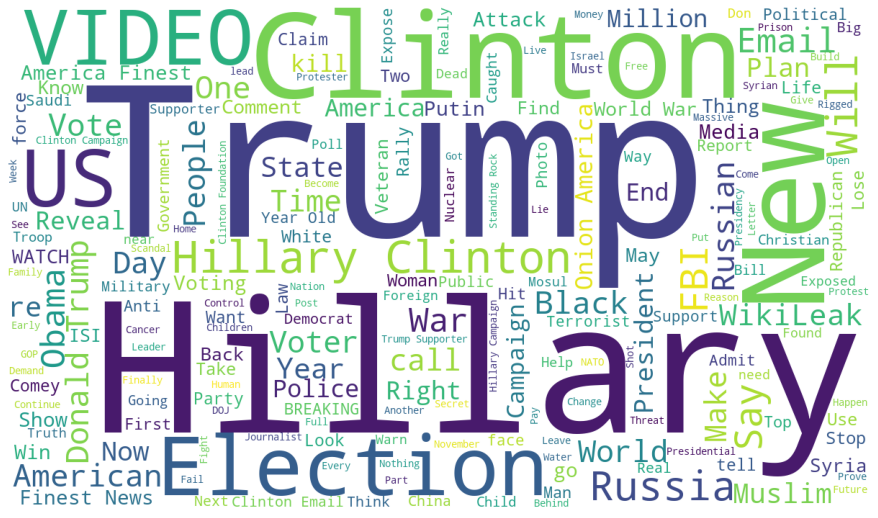

In [ ]:
import re
from wordcloud import WordCloud,STOPWORDS
text_list=df.loc[df['label']==1,'title'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent    

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

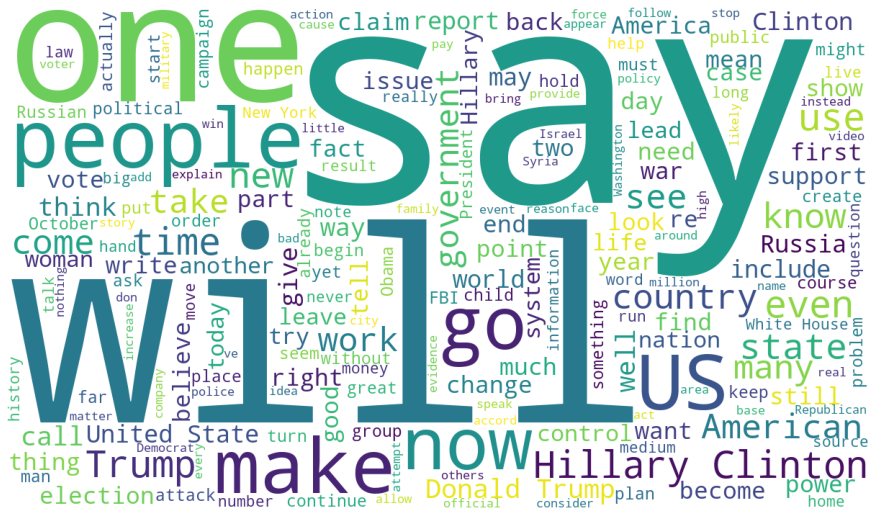

In [ ]:
#@title
text_list=df.loc[df['label']==1,'text'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent    

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### b. Most common words present in REAL NEWS title and text

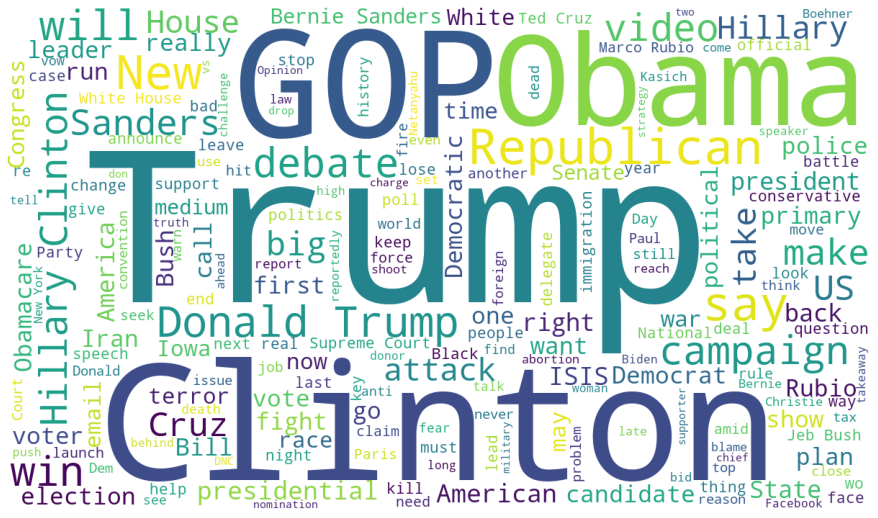

In [ ]:
text_list=df.loc[df['label']==0,'title'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent    

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

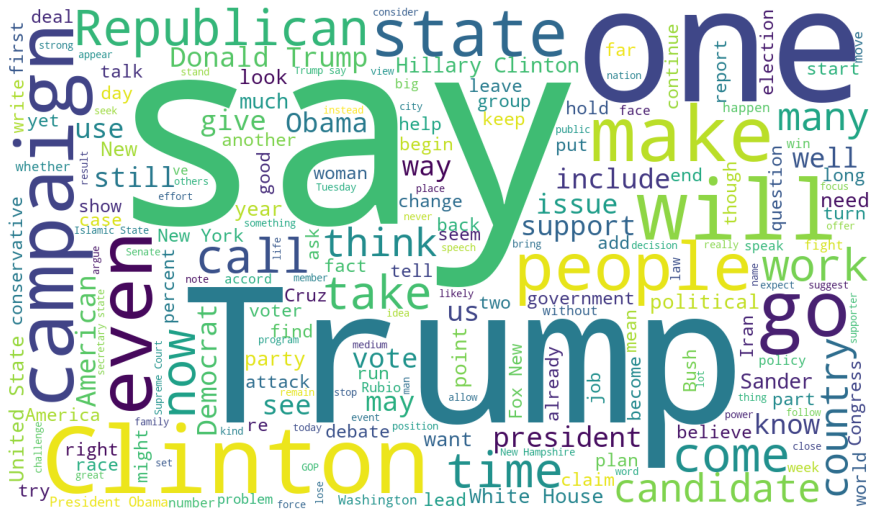

In [ ]:
text_list=df.loc[df['label']==0,'text'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent    

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# PART 2. Model Training

*   Logistic Regression
*   Naive Bayesian
*   Decision Tree
*   Support Vector Machines
*   K-Nearst-Neighbors


In [34]:
# Import relevant modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Import libraries for decision tree plot
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
import graphviz

# Import libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#Import libraries for parameter tuning
from sklearn.model_selection import GridSearchCV

# Import libraries for evaluation measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import time

Define evaluation report for future use

In [35]:
# Make class prediction for test set
# y_pred_class is the binary label
# y_pred_prob is the probability estimate

def print_report(y, y_pred_class,fit_time,pred_time):
    print("Accuracy:",accuracy_score(y, y_pred_class, normalize=True, sample_weight=None))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred_class))
    print("Classification Report:\n",classification_report(y, y_pred_class))
    print("Fit runtime: ",fit_time)
    print("Prediction runtime: ",pred_time)
    print("Total runtime: ", fit_time+pred_time)

In [36]:
def print_roc(title, y, y_pred_prob):
    # y_test is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)
    # Aread under ROC curve
    roc_auc=auc(fpr,tpr)
    print("Area under ROC curve is", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, marker='o',color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic\n'+title)
    plt.legend(loc="lower right")
    plt.show()

## 2.0.1 Data Split

In [37]:
df['whole_text']=df['title']+" "+df['text']
X=df[['title','text','whole_text']]
Y=df['label']
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_all, y_train_all, test_size=0.3, random_state=101)

In [38]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(3072, 3)
(1317, 3)
(1881, 3)


## 2.0.2 Vectorize

### a. Fit by train, then transform Validation and Test

#### Vectorized by title

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# https://www.heywhale.com/mw/project/619b68e6a669ec0018ab6a24
vectorizer_title = CountVectorizer(encoding='utf-8',analyzer='word',lowercase=True,ngram_range=(1,5),stop_words='english',
                strip_accents=('unicode'),min_df=0.02,max_df=0.8)
x_train_title_vec = vectorizer_title.fit_transform(x_train['title'])

x_valid_title_vec = vectorizer_title.transform(x_validation['title'])

x_test_title_vec = vectorizer_title.transform(x_test['title'])

print(vectorizer_title.get_feature_names())

['2016', 'america', 'campaign', 'clinton', 'debate', 'donald', 'donald trump', 'election', 'fbi', 'gop', 'hillary', 'hillary clinton', 'house', 'new', 'news', 'obama', 'russia', 'sanders', 'say', 'state', 'trump', 'video', 'war']


#### Vectorized by text

In [47]:
vectorizer_text = CountVectorizer(encoding='utf-8',analyzer='word',lowercase=True,ngram_range=(1,5),stop_words='english',
                strip_accents=('unicode'),min_df=0.02,max_df=0.8)
x_train_text_vec=vectorizer_text.fit_transform(x_train['text'])

x_valid_text_vec = vectorizer_text.transform(x_validation['text'])

x_test_text_vec = vectorizer_text.transform(x_test['text'])

print(vectorizer_text.get_feature_names())

['000', '000 people', '10', '10 000', '10 year', '100', '11', '12', '13', '14', '15', '15 year', '16', '17', '18', '19', '1980s', '1990s', '1992', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2016 election', '2016 presidential', '2017', '21', '22', '23', '24', '25', '26', '27', '27 2016', '28', '28 2016', '29', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '400', '41', '43', '44', '45', '46', '47', '48', '49', '50', '500', '55', '60', '70', '80', '90', 'abandon', 'abc', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'accept', 'access', 'accomplish', 'accord', 'according', 'account', 'accountable', 'accurate', 'accusation', 'accuse', 'achieve', 'acknowledge', 'act', 'action', 'active', 'actively', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'add', 'addition', 'additional', 'address', 'administration', '

#### Vectorized by whole text

In [48]:
vectorizer_whole = CountVectorizer(encoding='utf-8',analyzer='word',lowercase=True,ngram_range=(1,5),stop_words='english',
                strip_accents=('unicode'),min_df=0.02,max_df=0.8) 
x_train_whole_vec=vectorizer_whole.fit_transform(x_train['whole_text'])

x_valid_whole_vec = vectorizer_whole.transform(x_validation['whole_text'])

x_test_whole_vec = vectorizer_whole.transform(x_test['whole_text'])

print(vectorizer_whole.get_feature_names())

['000', '000 people', '10', '10 000', '10 year', '100', '11', '12', '13', '14', '15', '15 year', '16', '17', '18', '19', '1980s', '1990s', '1992', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2016 election', '2016 presidential', '2017', '21', '22', '23', '24', '25', '26', '27', '27 2016', '28', '28 2016', '29', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '400', '41', '43', '44', '45', '46', '47', '48', '49', '50', '500', '55', '60', '70', '80', '90', 'abandon', 'abc', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'accept', 'access', 'accomplish', 'accord', 'according', 'account', 'accountable', 'accurate', 'accusation', 'accuse', 'achieve', 'acknowledge', 'act', 'action', 'active', 'actively', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'add', 'addition', 'additional', 'address', 'administration', '

### b. Fit by train all (train+valiation), then transform Test

#### Vectorized by text

In [49]:
vectorizer_all_text = CountVectorizer(encoding='utf-8',analyzer='word',lowercase=True,ngram_range=(1,5),stop_words='english',
                                      strip_accents=('unicode'),min_df=0.02,max_df=0.8)
x_train_all_text_vec=vectorizer_all_text.fit_transform(x_train_all['text'])

x_test_text_vec=vectorizer_all_text.transform(x_test['text'])


print(vectorizer_all_text.get_feature_names())

['000', '000 people', '10', '10 000', '10 year', '100', '11', '12', '13', '14', '15', '15 year', '16', '17', '18', '19', '1980s', '1990s', '20', '20 year', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2016 election', '2016 presidential', '2017', '21', '22', '23', '24', '25', '26', '27', '27 2016', '28', '28 2016', '29', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '400', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '500', '55', '60', '70', '75', '80', '90', 'abandon', 'abc', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'accept', 'access', 'accomplish', 'accord', 'according', 'account', 'accurate', 'accusation', 'accuse', 'achieve', 'acknowledge', 'act', 'action', 'active', 'actively', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'add', 'addition', 'additional', 'address', 'administration', '

#### Vectorized by whole text

In [50]:
vectorizer_all_whole = CountVectorizer(encoding='utf-8',analyzer='word',lowercase=True,ngram_range=(1,5),stop_words='english',
                                       strip_accents=('unicode'),min_df=0.02,max_df=0.8) 
x_train_all_whole_vec=vectorizer_all_whole.fit_transform(x_train_all['whole_text'])

x_test_whole_vec=vectorizer_all_whole.transform(x_test['whole_text'])

print(vectorizer_all_whole.get_feature_names())

['000', '000 people', '10', '10 000', '10 year', '100', '11', '12', '13', '14', '15', '15 year', '16', '17', '18', '19', '1980s', '1990s', '20', '20 year', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2016 election', '2016 presidential', '2017', '21', '22', '23', '24', '25', '26', '27', '27 2016', '28', '28 2016', '29', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '400', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '500', '55', '60', '70', '75', '80', '90', 'abandon', 'abc', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'accept', 'access', 'accomplish', 'accord', 'according', 'account', 'accurate', 'accusation', 'accuse', 'achieve', 'acknowledge', 'act', 'action', 'active', 'actively', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'add', 'addition', 'additional', 'address', 'administration', '

## 2.1 Logistics Regression

### 2.1.0 Model with title_length & text_length

In [51]:
# Prepare the dataset of title_length and text length
X_L=df[['title_length', 'text_length']]
Y=df['label']

xl_train, xl_test, y_train, y_test = train_test_split(X_L, Y, test_size=0.3, random_state=101)
xl_train, xl_validation, y_train, y_validation = train_test_split(xl_train, y_train, test_size=0.3, random_state=101)

In [52]:
start1 = time.time()
lr_length = LogisticRegression()
lr_length.fit(xl_train, y_train)
end1 = time.time()

start2 = time.time()
lr_length_pred = lr_length.predict(xl_validation)
lr_length_pred_prob = lr_length.predict_proba(xl_validation)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6264236902050114
Confusion Matrix:
 [[438 223]
 [269 387]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       661
           1       0.63      0.59      0.61       656

    accuracy                           0.63      1317
   macro avg       0.63      0.63      0.63      1317
weighted avg       0.63      0.63      0.63      1317

Fit runtime:  0.026964187622070312
Prediction runtime:  0.0023031234741210938
Total runtime:  0.029267311096191406
Area under ROC curve is 0.6507255267333308


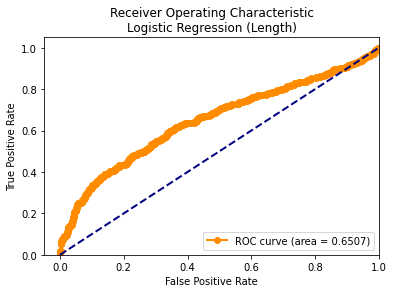

In [53]:
# Check the model performance
print_report(y_validation, lr_length_pred,fit_time,pred_time)
title = "Logistic Regression (Length)"
print_roc(title, y_validation, lr_length_pred_prob)

The poor performance indicates this model is infeasible.

### 2.1.1 Model with title data

In [54]:
start1 = time.time()
lr_title = LogisticRegression()
lr_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
lr_title_pred = lr_title.predict(x_valid_title_vec)
lr_title_pred_prob = lr_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6476841305998481
Confusion Matrix:
 [[304 357]
 [107 549]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57       661
           1       0.61      0.84      0.70       656

    accuracy                           0.65      1317
   macro avg       0.67      0.65      0.64      1317
weighted avg       0.67      0.65      0.63      1317

Fit runtime:  0.026775360107421875
Prediction runtime:  0.0005347728729248047
Total runtime:  0.02731013298034668
Area under ROC curve is 0.7094941146083171


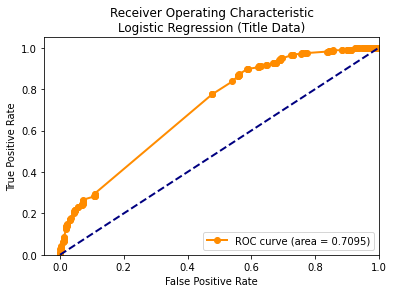

In [55]:
# Check the model performance
print_report(y_validation, lr_title_pred,fit_time,pred_time)
title = "Logistic Regression (Title Data)"
print_roc(title, y_validation, lr_title_pred_prob)

# Area under ROC curve is 0.7095

As the performance is much lower than text and whole text, we will not proceed to the other steps.

### 2.1.2 Model with text data

#### a. Fit model with all text features

In [56]:
start1 = time.time()
lr_text = LogisticRegression()
lr_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
lr_text_pred = lr_text.predict(x_valid_text_vec)
lr_text_pred_prob = lr_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9005315110098709
Confusion Matrix:
 [[603  58]
 [ 73 583]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       661
           1       0.91      0.89      0.90       656

    accuracy                           0.90      1317
   macro avg       0.90      0.90      0.90      1317
weighted avg       0.90      0.90      0.90      1317

Fit runtime:  0.29041004180908203
Prediction runtime:  0.002021312713623047
Total runtime:  0.2924313545227051
Area under ROC curve is 0.955547073908712


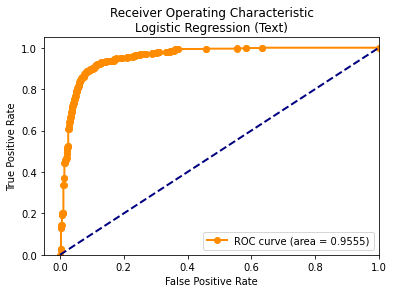

In [57]:
# Check the model performance
print_report(y_validation, lr_text_pred,fit_time,pred_time)
title = 'Logistic Regression (Text)'
print_roc(title, y_validation, lr_text_pred_prob)

#### b. Feature Selection

Define a function for determining k features selection based on ROC performance on validation set

In [58]:
# Applicable for Logistic Regression, multinomialNB and KNN feature selection.
def K_determinator(selector, max_k, train_set, valid_set, y_train, model_type, title):
    
    no_k=[]
    accuracy = []
    roc_auc = []
    
    if selector == "kbest":

        for k in range(10,max_k,10):
            ## Select K Best method
            selectkbest = SelectKBest(chi2, k=k)
            selectkbest.fit(train_set, y_train)
            x_train_vec_k = selectkbest.transform(train_set)
            x_valid_vec_k = selectkbest.transform(valid_set)

            no_k.append(k)

            if model_type == "mnb":
                model_k = MultinomialNB()
            elif model_type == "lr":
                model_k = LogisticRegression()
            elif model_type =="knn":
                model_k = KNeighborsClassifier()

            model_k = model_type
            model_k.fit(x_train_vec_k, y_train)

            y_pred_k = model_k.predict(x_valid_vec_k)
            y_prob_k = model_k.predict_proba(x_valid_vec_k)

            accuracy.append(accuracy_score(y_validation, y_pred_k, normalize=True, 
                                           sample_weight=None))

            fpr, tpr, thresholds = roc_curve(y_validation, y_prob_k[:,1], pos_label=1)
            roc_auc.append(auc(fpr,tpr))
            
    elif selector == "from_model":
        
        for k in range(50,max_k,10):
            ## Select From Model method
            lr = LogisticRegression()
            lr.fit(train_set, y_train)
            lr.coef_
            selector = SelectFromModel(lr, prefit=True,max_features=k,threshold=-np.inf)
            x_train_vec_k = selector.transform(train_set)
            x_valid_vec_k = selector.transform(valid_set)

            no_k.append(k)
            if model_type == "mnb":
                model_k = MultinomialNB()
            elif model_type == "lr":
                model_k = LogisticRegression()
            elif model_type =="knn":
              model_k = KNeighborsClassifier()


            model_k = model_type
            model_k.fit(x_train_vec_k, y_train)

            y_pred_k = model_k.predict(x_valid_vec_k)
            y_prob_k = model_k.predict_proba(x_valid_vec_k)
            
            accuracy.append(accuracy_score(y_validation, y_pred_k, normalize=True, 
                                           sample_weight=None))

            fpr, tpr, thresholds = roc_curve(y_validation, y_prob_k[:,1], pos_label=1)
            roc_auc.append(auc(fpr,tpr))

    fig, ax1 = plt.subplots()
    ax1.plot(no_k, accuracy, color='red')
    ax1.set_ylabel('accuracy', color='red')
    ax2 = ax1.twinx()
    ax2.plot(no_k, roc_auc, color='blue')
    ax2.set_ylabel('roc_auc', color='blue')

    fig.tight_layout()
    plt.title('Performance with k features\n'+title)
    plt.show()

    no_k = np.array(no_k)
    accuracy = np.array(accuracy)
    roc_auc = np.array(roc_auc)
    filter_best_accuracy_k = no_k[np.argmax(accuracy)]
    filter_best_auc_k = no_k[np.argmax(roc_auc)]

    print("The maximum accuracy is ", round(accuracy.max(),4), "with ", filter_best_accuracy_k, "features.")
    print("The maximum roc_auc is ", round(roc_auc.max(),4), "with ", filter_best_auc_k, "features.")


##### Select k best

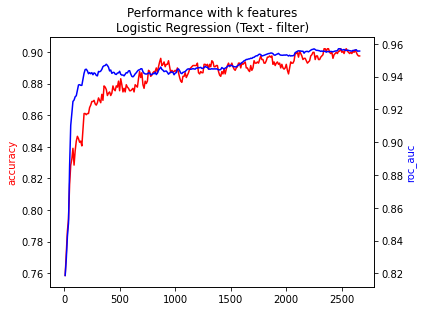

The maximum accuracy is  0.9021 with  2340 features.
The maximum roc_auc is  0.957 with  2470 features.


In [59]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Logistic Regression (Text - filter)'
K_determinator("kbest", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, lr_text, title)

# The maximum roc_auc is  0.957 with  2470 features.

##### Select from model

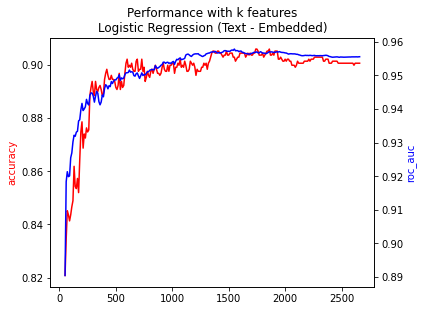

The maximum accuracy is  0.9058 with  1740 features.
The maximum roc_auc is  0.9579 with  1550 features.


In [60]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Logistic Regression (Text - Embedded)'
K_determinator("from_model", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, lr_text, title)

# The maximum roc_auc is  0.9579 with  1550 features.

### 2.1.3 Model with whole_text data

#### a. Fit model with all whole_text features

In [61]:
start1 = time.time()
lr_whole = LogisticRegression()
lr_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
lr_whole_pred = lr_whole.predict(x_valid_whole_vec)
lr_whole_pred_prob = lr_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.90584662110858
Confusion Matrix:
 [[603  58]
 [ 66 590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       661
           1       0.91      0.90      0.90       656

    accuracy                           0.91      1317
   macro avg       0.91      0.91      0.91      1317
weighted avg       0.91      0.91      0.91      1317

Fit runtime:  0.2789771556854248
Prediction runtime:  0.0022716522216796875
Total runtime:  0.2812488079071045
Area under ROC curve is 0.9554617449540606


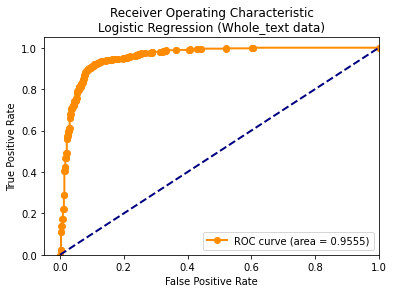

In [62]:
# Check the model performance
print_report(y_validation, lr_whole_pred,fit_time,pred_time)
title = 'Logistic Regression (Whole_text data)'
print_roc(title, y_validation, lr_whole_pred_prob)

#### b. Feature Selection

##### Select k best

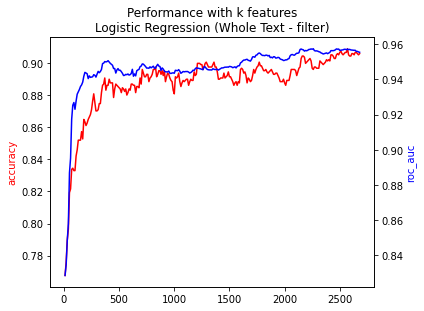

The maximum accuracy is  0.9089 with  2570 features.
The maximum roc_auc is  0.9574 with  2260 features.


In [63]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Logistic Regression (Whole Text - filter)'
K_determinator("kbest", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, lr_whole, title)

# The maximum roc_auc is  0.9574 with  2260 features.

##### Select from model

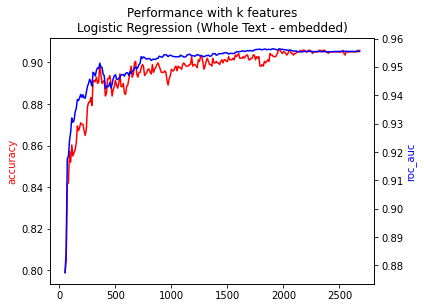

The maximum accuracy is  0.9066 with  1960 features.
The maximum roc_auc is  0.9564 with  1900 features.


In [64]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Logistic Regression (Whole Text - embedded)'
K_determinator("from_model", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, lr_whole, title)

# The maximum roc_auc is  0.9564 with  1900 features.

### 2.1.4 Best logistic regression model

We choose the model fit with 1550 text features selected by embedded method as the best model under Logistic Regression.

In [65]:
# Fit model with 1550 selected features using SelectFromModel
lr = LogisticRegression()
lr.fit(x_train_text_vec, y_train)
lr.coef_
selector = SelectFromModel(lr, prefit=True,max_features=1550,threshold=-np.inf)
x_train_text_vec_lr = selector.transform(x_train_text_vec)
x_valid_text_vec_lr = selector.transform(x_valid_text_vec)
x_train_text_vec_lr.shape

(3072, 1550)

In [66]:
lr_best = LogisticRegression()
start1 = time.time()
lr_best.fit(x_train_text_vec_lr, y_train)
end1 = time.time()

start2 = time.time()
lr_best_pred = lr_best.predict(x_valid_text_vec_lr)
lr_best_pred_prob = lr_best.predict_proba(x_valid_text_vec_lr)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9028094153378892
Confusion Matrix:
 [[602  59]
 [ 69 587]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       661
           1       0.91      0.89      0.90       656

    accuracy                           0.90      1317
   macro avg       0.90      0.90      0.90      1317
weighted avg       0.90      0.90      0.90      1317

Fit runtime:  0.18357133865356445
Prediction runtime:  0.0014061927795410156
Total runtime:  0.18497753143310547
Area under ROC curve is 0.9578728644699458


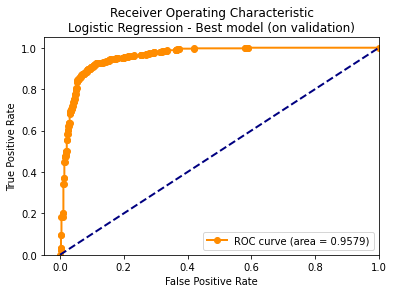

In [67]:
# Check the model performance
print_report(y_validation, lr_best_pred,fit_time,pred_time)
title = 'Logistic Regression - Best model (on validation)'
print_roc(title, y_validation, lr_best_pred_prob)

## 2.2 Naive Bayes

### 2.2.1 Model with title data

In [68]:
start1 = time.time()
mnb_title = MultinomialNB()
mnb_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
mnb_title_pred = mnb_title.predict(x_valid_title_vec)
mnb_title_pred_prob = mnb_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.59832953682612
Confusion Matrix:
 [[571  90]
 [439 217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.68       661
           1       0.71      0.33      0.45       656

    accuracy                           0.60      1317
   macro avg       0.64      0.60      0.57      1317
weighted avg       0.64      0.60      0.57      1317

Fit runtime:  0.006409645080566406
Prediction runtime:  0.0011484622955322266
Total runtime:  0.007558107376098633
Area under ROC curve is 0.6992269657946201


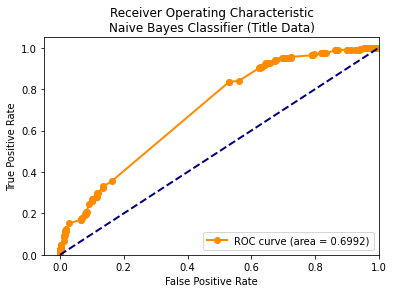

In [69]:
# Check the model performance using ROC
print_report(y_validation, mnb_title_pred,fit_time,pred_time)
title = 'Naive Bayes Classifier (Title Data)'
print_roc(title, y_validation, mnb_title_pred_prob)

As the performance is much lower than text and whole text, we will not proceed to the other steps.

### 2.2.2 Model with text data

#### a. Fit model with all text features

In [70]:
start1 = time.time()
mnb_text = MultinomialNB()
mnb_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
mnb_text_pred = mnb_text.predict(x_valid_text_vec)
mnb_text_pred_prob = mnb_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.85041761579347
Confusion Matrix:
 [[545 116]
 [ 81 575]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       661
           1       0.83      0.88      0.85       656

    accuracy                           0.85      1317
   macro avg       0.85      0.85      0.85      1317
weighted avg       0.85      0.85      0.85      1317

Fit runtime:  0.00689244270324707
Prediction runtime:  0.0062983036041259766
Total runtime:  0.013190746307373047
Area under ROC curve is 0.9069522342348991


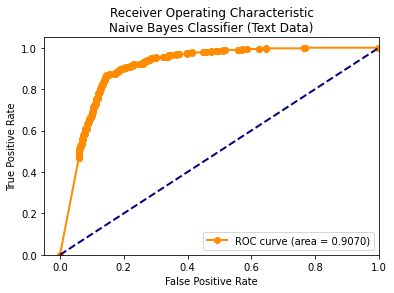

In [71]:
# Check the model performance
print_report(y_validation, mnb_text_pred,fit_time,pred_time)
title = 'Naive Bayes Classifier (Text Data)'
print_roc(title, y_validation, mnb_text_pred_prob)

#### b. Feature selection

##### Select k best

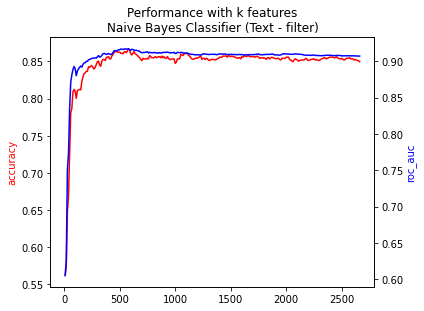

The maximum accuracy is  0.8671 with  580 features.
The maximum roc_auc is  0.9174 with  580 features.


In [72]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Naive Bayes Classifier (Text - filter)'
K_determinator("kbest", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, mnb_text, title)

# The maximum roc_auc is  0.9174 with  580 features.

##### Select from model

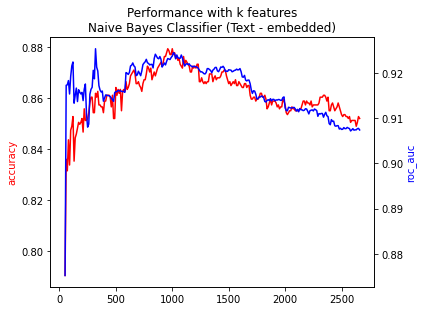

The maximum accuracy is  0.8793 with  960 features.
The maximum roc_auc is  0.9254 with  320 features.


In [73]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Naive Bayes Classifier (Text - embedded)'
K_determinator("from_model", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, mnb_text, title)

# The maximum roc_auc is  0.9254 with  320 features.

### 2.2.3 Model with whole_text data

#### a. Fit model with all whole_text features

In [74]:
start1 = time.time()
mnb_whole = MultinomialNB()
mnb_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
mnb_whole_pred = mnb_whole.predict(x_valid_whole_vec)
mnb_whole_pred_prob = mnb_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.856492027334852
Confusion Matrix:
 [[550 111]
 [ 78 578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       661
           1       0.84      0.88      0.86       656

    accuracy                           0.86      1317
   macro avg       0.86      0.86      0.86      1317
weighted avg       0.86      0.86      0.86      1317

Fit runtime:  0.00960993766784668
Prediction runtime:  0.0038955211639404297
Total runtime:  0.01350545883178711
Area under ROC curve is 0.9085192889561271


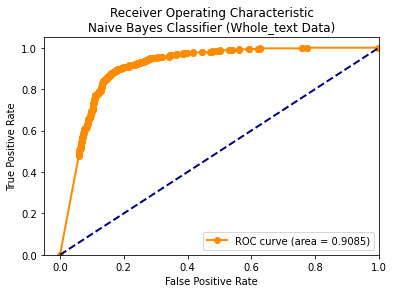

In [75]:
# Check the model performance
print_report(y_validation, mnb_whole_pred,fit_time,pred_time)
title = 'Naive Bayes Classifier (Whole_text Data)'
print_roc(title, y_validation, mnb_whole_pred_prob)

#### b. Feature selection

##### Select k best

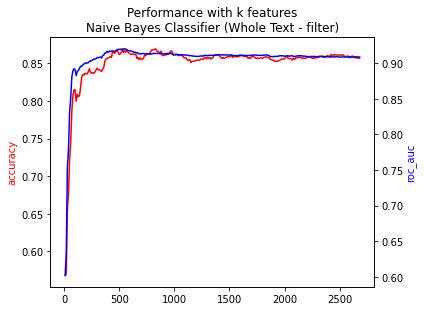

The maximum accuracy is  0.8694 with  530 features.
The maximum roc_auc is  0.9204 with  550 features.


In [76]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Naive Bayes Classifier (Whole Text - filter)'
K_determinator("kbest", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, mnb_whole, title)

# The maximum roc_auc is  0.9204 with 550 features.

##### Select from model

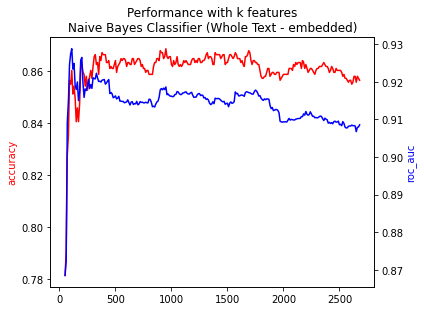

The maximum accuracy is  0.8686 with  950 features.
The maximum roc_auc is  0.9288 with  110 features.


In [77]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'Naive Bayes Classifier (Whole Text - embedded)'
K_determinator("from_model", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, mnb_whole, title)

# The maximum roc_auc is  0.9288 with 110 features.

### 2.2.4 Best Naive Bayes Classifier model

We choose the model fit with 110 whole text features selected by embedded method as the best model under Naive Bayes Classifier.

In [78]:
# Fit model with 110 selected features using SelectFromModel
lr = LogisticRegression()
lr.fit(x_train_whole_vec, y_train)
lr.coef_
selector = SelectFromModel(lr, prefit=True,max_features=110,threshold=-np.inf)
x_train_whole_vec_nb = selector.transform(x_train_whole_vec)
x_valid_whole_vec_nb = selector.transform(x_valid_whole_vec)
x_train_whole_vec_nb.shape

(3072, 110)

In [79]:
start1 = time.time()
mnb_best = MultinomialNB()
mnb_best.fit(x_train_whole_vec_nb, y_train)
end1 = time.time()

start2 = time.time()
mnb_best_pred = mnb_best.predict(x_valid_whole_vec_nb)
mnb_best_pred_prob = mnb_best.predict_proba(x_valid_whole_vec_nb)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8602885345482156
Confusion Matrix:
 [[579  82]
 [102 554]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       661
           1       0.87      0.84      0.86       656

    accuracy                           0.86      1317
   macro avg       0.86      0.86      0.86      1317
weighted avg       0.86      0.86      0.86      1317

Fit runtime:  0.0027031898498535156
Prediction runtime:  0.0013844966888427734
Total runtime:  0.004087686538696289
Area under ROC curve is 0.9287791502158592


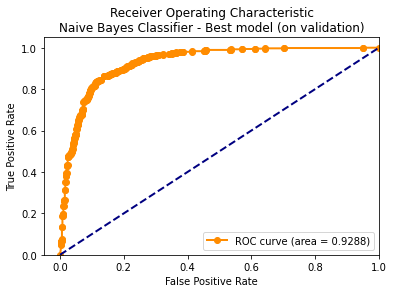

In [80]:
# Check the model performance
print_report(y_validation, mnb_best_pred,fit_time,pred_time)
title = 'Naive Bayes Classifier - Best model (on validation)'
print_roc(title, y_validation, mnb_best_pred_prob)

## 2.3 Decision Tree

### 2.3.1 Model with title data

#### a. Model the tree using a default setting

In [81]:
start1 = time.time()
dt_title = DecisionTreeClassifier()
dt_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
dt_title_pred = dt_title.predict(x_valid_title_vec)
dt_title_pred_prob = dt_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6537585421412301
Confusion Matrix:
 [[350 311]
 [145 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.53      0.61       661
           1       0.62      0.78      0.69       656

    accuracy                           0.65      1317
   macro avg       0.66      0.65      0.65      1317
weighted avg       0.66      0.65      0.65      1317

Fit runtime:  0.006421566009521484
Prediction runtime:  0.0013096332550048828
Total runtime:  0.007731199264526367
Area under ROC curve is 0.7065502656728534


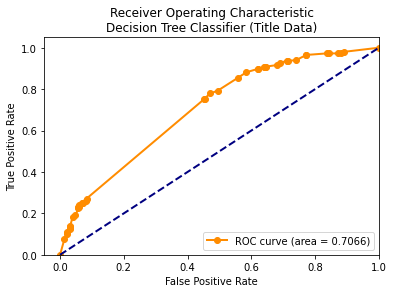

In [82]:
# Check the model performance
print_report(y_validation,dt_title_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Title Data)'
print_roc(title, y_validation, dt_title_pred_prob)

In [83]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_title,out_file=None, 
                                feature_names=vectorizer_title.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("title_tree_defualt") 

'title_tree_defualt.pdf'

As the performance is much lower than text and whole text, we will not proceed to the other steps.

### 2.3.2 Model with text data

#### a. Model the tree under a default setting

In [84]:
start1 = time.time()
dt_text = DecisionTreeClassifier() #criterion='entropy',max_depth=5, min_samples_split=2)
dt_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
dt_text_pred = dt_text.predict(x_valid_text_vec)
dt_text_pred_prob = dt_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8041002277904328
Confusion Matrix:
 [[529 132]
 [126 530]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       661
           1       0.80      0.81      0.80       656

    accuracy                           0.80      1317
   macro avg       0.80      0.80      0.80      1317
weighted avg       0.80      0.80      0.80      1317

Fit runtime:  0.8178579807281494
Prediction runtime:  0.004073619842529297
Total runtime:  0.8219316005706787
Area under ROC curve is 0.8041147005645549


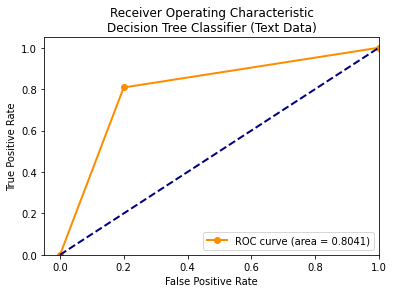

In [85]:
# Check the model performance
print_report(y_validation,dt_text_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Text Data)'
print_roc(title, y_validation,dt_text_pred_prob)

In [86]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_text,out_file=None, 
                                feature_names=vectorizer_text.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("text_tree_rand") 

'text_tree_rand.pdf'

#### b. Model using GridSearchCV

In [87]:
# Determine the best hyper-parameters
ParameterGrid={'min_samples_split':range(1,10,1),'max_depth': range(1,10,1)}
clf_tree = DecisionTreeClassifier(criterion='entropy')
clf2 = GridSearchCV(clf_tree, ParameterGrid, scoring='roc_auc', cv=10)#, verbose=3)
clf2.fit(x_train_text_vec, y_train)
clf2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [88]:
# Desplay the test score with different hyperparameters 
means = clf2.cv_results_['mean_test_score']
params = clf2.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

nan  with:   {'max_depth': 1, 'min_samples_split': 1}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 2}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 3}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 4}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 5}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 6}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 7}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 8}
0.698148  with:   {'max_depth': 1, 'min_samples_split': 9}
nan  with:   {'max_depth': 2, 'min_samples_split': 1}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 2}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 3}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 4}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 5}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 6}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 7}
0.752276  with:   {'max_depth': 2, 'min_samples_split': 8}
0.75227

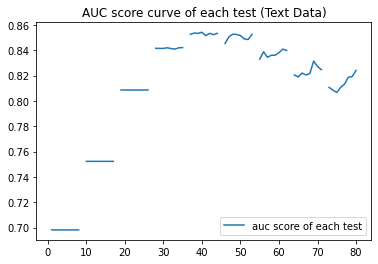

In [89]:
test_scores = clf2.cv_results_['mean_test_score']
plt.plot(test_scores, label='auc score of each test')
plt.legend(loc='best')
plt.title('AUC score curve of each test (Text Data)')
plt.show()

In [90]:
# Fit model with the best hyper-parameters
start1 = time.time()
dt_text_gs = clf2.best_estimator_
end1 = time.time()

start2 = time.time()
dt_text_gs_pred = dt_text_gs.predict(x_valid_text_vec)
dt_text_gs_pred_prob = dt_text_gs.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8010630220197419
Confusion Matrix:
 [[517 144]
 [118 538]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       661
           1       0.79      0.82      0.80       656

    accuracy                           0.80      1317
   macro avg       0.80      0.80      0.80      1317
weighted avg       0.80      0.80      0.80      1317

Fit runtime:  4.5299530029296875e-05
Prediction runtime:  0.005989789962768555
Total runtime:  0.0060350894927978516
Area under ROC curve is 0.8574291539057599


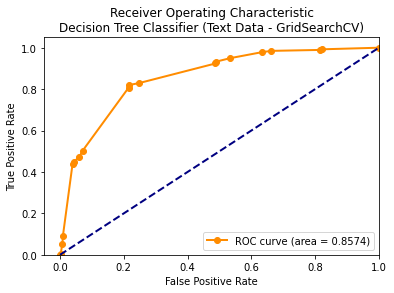

In [91]:
# Check the model performance
print_report(y_validation,dt_text_gs_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Text Data - GridSearchCV)'
print_roc(title, y_validation, dt_text_gs_pred_prob)

In [92]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_text_gs,out_file=None, 
                                feature_names=vectorizer_text.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("text_tree_clf") 

'text_tree_clf.pdf'

#### c. Pre-pruning method manually

In previous experiments, we can find the min_sample_splits has no obvious affect on auc performance in our case (see the AUC of each test graph). So we only use max_depth to prune the decision tree.

In [93]:
# Determine the best hyper-parameters
max_depth = np.linspace(1,40,40, endpoint=True)
train_results_text =[]
valid_results_text = []
# create a loop to try out all the number from 1 to 32 as max_depth in a decision tree
for max_depth_i in max_depth: 
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_i)
    dt.fit(x_train_text_vec, y_train)
    
    # evalute model performance on training set    
    train_pred = dt.predict(x_train_text_vec)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    # append the result to the list train_results
    train_results_text.append(accuracy)
    
    # evalute model performance on validation set        
    y_pred = dt.predict(x_valid_text_vec)
    accuracy = accuracy_score(y_validation, y_pred, normalize=True, sample_weight=None)
    # append the result to the list valid_results
    valid_results_text.append(accuracy)

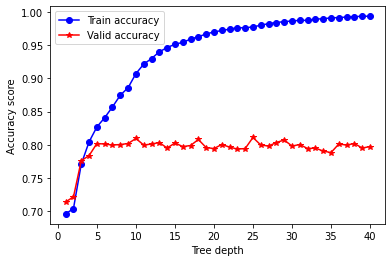

In [94]:
%matplotlib inline

line1, = plt.plot(max_depth, train_results_text, marker='o', color='b', label='Train accuracy')
line2, = plt.plot(max_depth, valid_results_text, marker='*', color='r', label='Valid accuracy')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

Here we find the max_depth which can best prevent overfitting is: 6.


In [95]:
# Fit model with best hyper-parameters
start1 = time.time()
dt_text_pre = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt_text_pre.fit(x_valid_text_vec, y_validation)
end1 = time.time()

start2 = time.time()
dt_text_pre_pred = dt_text_pre.predict(x_valid_text_vec)
dt_text_pre_pred_prob = dt_text_pre.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8625664388762339
Confusion Matrix:
 [[552 109]
 [ 72 584]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       661
           1       0.84      0.89      0.87       656

    accuracy                           0.86      1317
   macro avg       0.86      0.86      0.86      1317
weighted avg       0.86      0.86      0.86      1317

Fit runtime:  0.11095428466796875
Prediction runtime:  0.0033974647521972656
Total runtime:  0.11435174942016602
Area under ROC curve is 0.9378655307922217


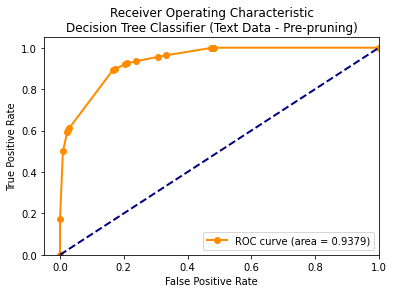

In [96]:
# Check the model performance
print_report(y_validation,dt_text_pre_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Text Data - Pre-pruning)'
print_roc(title, y_validation, dt_text_pre_pred_prob)

In [97]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_text_pre,out_file=None, 
                                feature_names=vectorizer_text.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("text_tree_pre") 

'text_tree_pre.pdf'

### 2.3.3 Model with the whole_text data

#### a. Model the tree under a default setting

In [98]:
start1 = time.time()
dt_whole = DecisionTreeClassifier()#criterion='entropy',max_depth=5, min_samples_split=2)
dt_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
dt_whole_pred = dt_whole.predict(x_valid_whole_vec)
dt_whole_pred_prob = dt_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8071374335611238
Confusion Matrix:
 [[530 131]
 [123 533]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       661
           1       0.80      0.81      0.81       656

    accuracy                           0.81      1317
   macro avg       0.81      0.81      0.81      1317
weighted avg       0.81      0.81      0.81      1317

Fit runtime:  0.9355373382568359
Prediction runtime:  0.003914356231689453
Total runtime:  0.9394516944885254
Area under ROC curve is 0.8071577155824509


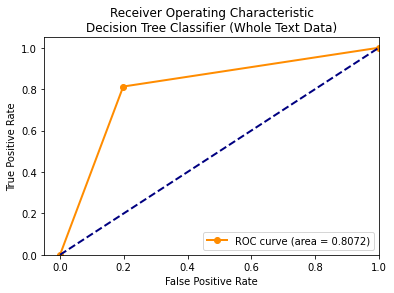

In [99]:
# Check the model performance
print_report(y_validation,dt_whole_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Whole Text Data)'
print_roc(title, y_validation, dt_whole_pred_prob)

In [100]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_whole,out_file=None, 
                                feature_names=vectorizer_whole.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("whole_tree_default") 

'whole_tree_default.pdf'

#### b. Model using GridSearchCV

In [101]:
# Determine the best hyper-parameters
from sklearn.model_selection import GridSearchCV
ParameterGrid={'min_samples_split':range(1,10,1),'max_depth': range(1,10,1)}
clf_tree = DecisionTreeClassifier(criterion='entropy')
clf3 = GridSearchCV(clf_tree, ParameterGrid, scoring='roc_auc', cv=10)#, verbose=3)
clf3.fit(x_train_whole_vec, y_train)
clf3.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=8)

In [102]:
# Desplay the test score with different hyperparameters 
means = clf3.cv_results_['mean_test_score']
params = clf3.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

nan  with:   {'max_depth': 1, 'min_samples_split': 1}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 2}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 3}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 4}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 5}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 6}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 7}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 8}
0.694371  with:   {'max_depth': 1, 'min_samples_split': 9}
nan  with:   {'max_depth': 2, 'min_samples_split': 1}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 2}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 3}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 4}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 5}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 6}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 7}
0.754860  with:   {'max_depth': 2, 'min_samples_split': 8}
0.75486

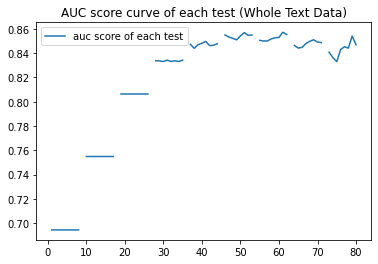

In [103]:
test_scores = clf3.cv_results_['mean_test_score']
plt.plot(test_scores, label='auc score of each test')
plt.legend(loc='best')
plt.title('AUC score curve of each test (Whole Text Data)')
plt.show()

In [104]:
# Fit model with the best hyper-parameters
start1 = time.time()
dt_whole_gs = clf3.best_estimator_
end1 = time.time()

start2 = time.time()
dt_whole_gs_pred = dt_whole_gs.predict(x_valid_whole_vec)
dt_whole_gs_pred_prob = dt_whole_gs.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8116932422171602
Confusion Matrix:
 [[515 146]
 [102 554]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       661
           1       0.79      0.84      0.82       656

    accuracy                           0.81      1317
   macro avg       0.81      0.81      0.81      1317
weighted avg       0.81      0.81      0.81      1317

Fit runtime:  5.936622619628906e-05
Prediction runtime:  0.007305145263671875
Total runtime:  0.007364511489868164
Area under ROC curve is 0.869874497251024


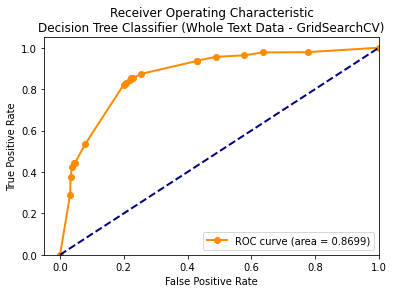

In [105]:
# Check the model performance
print_report(y_validation,dt_whole_gs_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Whole Text Data - GridSearchCV)'
print_roc(title, y_validation, dt_whole_gs_pred_prob)

In [106]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_whole_gs,out_file=None, 
                                feature_names=vectorizer_whole.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("whole_tree_clf") 

'whole_tree_clf.pdf'

#### c. Pre-pruning method manually

In previous experiments, we can find the min_sample_splits has no obvious affect on auc performance in our case. So we only use max_depth to prune the decision tree.

In [107]:
# Determine the best hyper-parameters
max_depth = np.linspace(1,40,40, endpoint=True)
train_results_whole =[]
valid_results_whole = []
# create a loop to try out all the number from 1 to 32 as max_depth in a decision tree
for max_depth_i in max_depth: 
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_i)
    dt.fit(x_train_whole_vec, y_train)
    
    # evalute model performance on training set    
    train_pred = dt.predict(x_train_whole_vec)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    # append the result to the list train_results
    train_results_whole.append(accuracy)
    
    # evalute model performance on validation set        
    y_pred = dt.predict(x_valid_whole_vec)
    accuracy = accuracy_score(y_validation, y_pred, normalize=True, sample_weight=None)
    # append the result to the list valid_results
    valid_results_whole.append(accuracy)

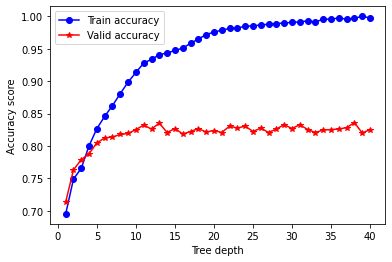

In [108]:
%matplotlib inline

line1, = plt.plot(max_depth, train_results_whole, marker='o', color='b', label='Train accuracy')
line2, = plt.plot(max_depth, valid_results_whole, marker='*', color='r', label='Valid accuracy')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

We can see the accuracy does not continue to increase when max depth reaches 6. So when max depth reaches 6, any increase is meaningless. Therefore, here we assume the max_depth of 6 is the best and can best prevent overfitting.


In [109]:
# Fit model with best hyper-parameters
start1 = time.time()
dt_whole_pre = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt_whole_pre.fit(x_valid_whole_vec, y_validation)
end1 = time.time()

start2 = time.time()
dt_whole_pre_pred = dt_whole_pre.predict(x_valid_whole_vec)
dt_whole_pre_pred_prob = dt_whole_pre.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8678815489749431
Confusion Matrix:
 [[548 113]
 [ 61 595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       661
           1       0.84      0.91      0.87       656

    accuracy                           0.87      1317
   macro avg       0.87      0.87      0.87      1317
weighted avg       0.87      0.87      0.87      1317

Fit runtime:  0.10478425025939941
Prediction runtime:  0.0033884048461914062
Total runtime:  0.10817265510559082
Area under ROC curve is 0.9396055496107154


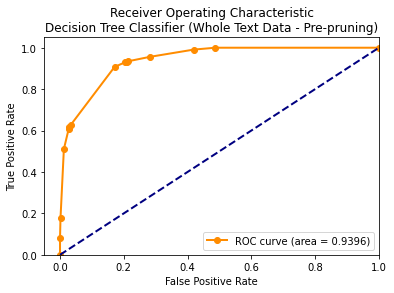

In [110]:
# Check the model performance
print_report(y_validation,dt_whole_pre_pred,fit_time,pred_time)
title = 'Decision Tree Classifier (Whole Text Data - Pre-pruning)'
print_roc(title, y_validation, dt_whole_pre_pred_prob)

In [111]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_whole_pre,out_file=None, 
                                feature_names=vectorizer_whole.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("whole_tree_pre") 

'whole_tree_pre.pdf'

### 2.3.4 Best Decision Tree model

We choose the model fit with whole_text data (with hyperparameter: criterion='entropy', max_depth=6) as the best model under SVM.

## 2.4 Random Forest 

### 2.4.1 Model with the title data

In [112]:
start1 = time.time()
rf_title = RandomForestClassifier(random_state=0)
rf_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
rf_title_pred = rf_title.predict(x_valid_title_vec)
rf_title_pred_prob = rf_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6575550493545937
Confusion Matrix:
 [[347 314]
 [137 519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.52      0.61       661
           1       0.62      0.79      0.70       656

    accuracy                           0.66      1317
   macro avg       0.67      0.66      0.65      1317
weighted avg       0.67      0.66      0.65      1317

Fit runtime:  0.26239466667175293
Prediction runtime:  0.059529781341552734
Total runtime:  0.32192444801330566
Area under ROC curve is 0.7147118648758348


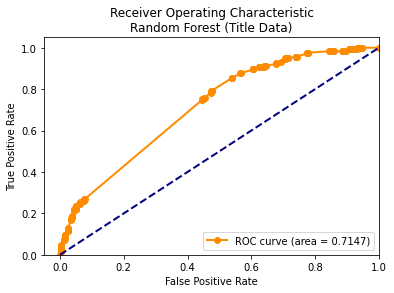

In [113]:
# Check the model performance
print_report(y_validation, rf_title_pred ,fit_time,pred_time)
title = 'Random Forest (Title Data)'
print_roc(title, y_validation, rf_title_pred_prob)

### 2.4.2 Model with the text data

#### a.Without hyperparameter tuning

In [114]:
start1 = time.time()
rf_text = RandomForestClassifier(random_state=0)
rf_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
rf_text_pred = rf_text.predict(x_valid_text_vec)
rf_text_pred_prob= rf_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9104024297646166
Confusion Matrix:
 [[609  52]
 [ 66 590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       661
           1       0.92      0.90      0.91       656

    accuracy                           0.91      1317
   macro avg       0.91      0.91      0.91      1317
weighted avg       0.91      0.91      0.91      1317

Fit runtime:  2.866060256958008
Prediction runtime:  0.1599116325378418
Total runtime:  3.0259718894958496
Area under ROC curve is 0.9652630437991218


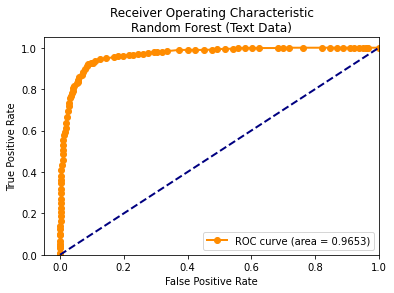

In [115]:
# Check the model performance
print_report(y_validation, rf_text_pred ,fit_time,pred_time)
title = 'Random Forest (Text Data)'
print_roc(title, y_validation, rf_text_pred_prob)

#### b. With hyperparameter tuning

In [116]:
rf_text_best = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [600,650,700,750,800]}
rf_gs = GridSearchCV(rf_text_best, params_rf, cv=5)
rf_gs.fit(x_train_text_vec, y_train)
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 650}


In [117]:
start1 = time.time()
rf_text_best = rf_gs.best_estimator_
rf_text_best.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
rf_text_best_pred = rf_text_best.predict(x_valid_text_vec)
rf_text_best_pred_prob= rf_text_best.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9020501138952164
Confusion Matrix:
 [[600  61]
 [ 68 588]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       661
           1       0.91      0.90      0.90       656

    accuracy                           0.90      1317
   macro avg       0.90      0.90      0.90      1317
weighted avg       0.90      0.90      0.90      1317

Fit runtime:  18.20617127418518
Prediction runtime:  1.0158960819244385
Total runtime:  19.22206735610962
Area under ROC curve is 0.9665418250249067


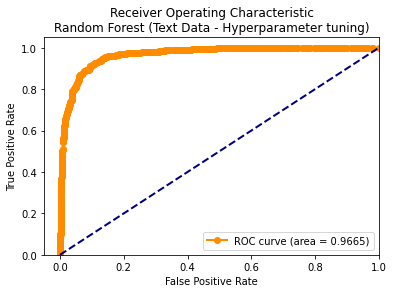

In [118]:
# Check the model performance
print_report(y_validation, rf_text_best_pred ,fit_time,pred_time)
title = 'Random Forest (Text Data - Hyperparameter tuning)'
print_roc(title, y_validation, rf_text_best_pred_prob)

### 2.4.3 Model with the whole_text data

#### a. Without hyperparameter tuning

In [119]:
start1 = time.time()
rf_whole = RandomForestClassifier(random_state=0)
rf_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
rf_whole_pred = rf_whole.predict(x_valid_whole_vec)
rf_whole_pred_prob= rf_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9020501138952164
Confusion Matrix:
 [[607  54]
 [ 75 581]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       661
           1       0.91      0.89      0.90       656

    accuracy                           0.90      1317
   macro avg       0.90      0.90      0.90      1317
weighted avg       0.90      0.90      0.90      1317

Fit runtime:  2.8603885173797607
Prediction runtime:  0.17120981216430664
Total runtime:  3.0315983295440674
Area under ROC curve is 0.9634561455296853


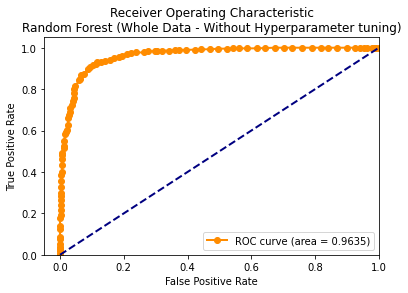

In [120]:
# Check the model performance
print_report(y_validation, rf_whole_pred ,fit_time,pred_time)
title = 'Random Forest (Whole Data - Without Hyperparameter tuning)'
print_roc(title, y_validation, rf_whole_pred_prob)

#### b. With hyperparameter tuning

In [121]:
rf_whole_best = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [650,700,750,800,900]}
rf_gs = GridSearchCV(rf_whole_best, params_rf, cv=5)
rf_gs.fit(x_train_whole_vec, y_train)
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 750}


In [122]:
start1 = time.time()
rf_whole_best = rf_gs.best_estimator_
rf_best.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
rf_best_pred = rf_whole_best.predict(x_valid_whole_vec)
rf_best_pred_prob= rf_whole_best.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.9104024297646166
Confusion Matrix:
 [[609  52]
 [ 66 590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       661
           1       0.92      0.90      0.91       656

    accuracy                           0.91      1317
   macro avg       0.91      0.91      0.91      1317
weighted avg       0.91      0.91      0.91      1317

Fit runtime:  21.22405219078064
Prediction runtime:  1.1864330768585205
Total runtime:  22.41048526763916
Area under ROC curve is 0.9651788679384524


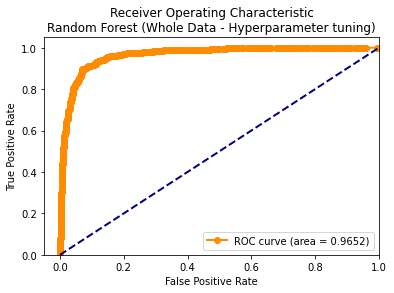

In [123]:
# Check the model performance
print_report(y_validation, rf_best_pred ,fit_time,pred_time)
title = 'Random Forest (Whole Data - Hyperparameter tuning)'
print_roc(title, y_validation,rf_best_pred_prob)

### 2.4.4 Best Random Forest model

We choose the model fit with text data (without hyperparameter) as the best model under Random Forest: 
- There is no significant improvement before and after hyperparameter turning. 
- There is no significant difference on ROC using text dataset or whole dataset. 

## 2.5 SVM

### 2.5.1 Model with the title data

In [124]:
start1 = time.time()
svm_title = SVC(kernel='linear', probability=True)
svm_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
svm_title_pred=svm_title.predict(x_valid_title_vec)
svm_title_pred_prob=svm_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.621867881548975
Confusion Matrix:
 [[254 407]
 [ 91 565]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.38      0.50       661
           1       0.58      0.86      0.69       656

    accuracy                           0.62      1317
   macro avg       0.66      0.62      0.60      1317
weighted avg       0.66      0.62      0.60      1317

Fit runtime:  0.7511358261108398
Prediction runtime:  0.0809776782989502
Total runtime:  0.83211350440979
Area under ROC curve is 0.6791446810080809


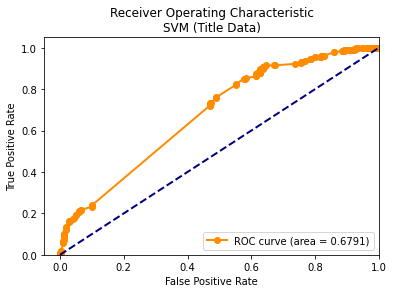

In [125]:
# Check the model performance
print_report(y_validation, svm_title_pred,fit_time,pred_time)
title = 'SVM (Title Data)'
print_roc(title, y_validation, svm_title_pred_prob)

### 2.5.2 Model with the text data

In [126]:
start1 = time.time()
svm_text = SVC(kernel='linear', probability=True)
svm_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
svm_text_pred=svm_text.predict(x_valid_text_vec)
svm_text_pred_prob=svm_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8602885345482156
Confusion Matrix:
 [[578  83]
 [101 555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       661
           1       0.87      0.85      0.86       656

    accuracy                           0.86      1317
   macro avg       0.86      0.86      0.86      1317
weighted avg       0.86      0.86      0.86      1317

Fit runtime:  20.04448628425598
Prediction runtime:  2.5034844875335693
Total runtime:  22.54797077178955
Area under ROC curve is 0.928436681303273


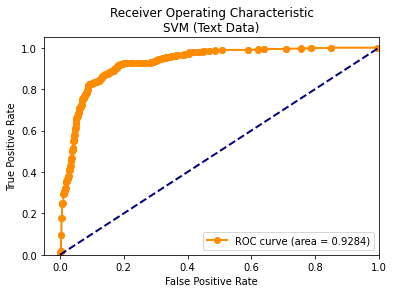

In [127]:
# Check the model performance
print_report(y_validation, svm_text_pred,fit_time,pred_time)
title = 'SVM (Text Data)'
print_roc(title, y_validation, svm_text_pred_prob)

### 2.5.3 Model with the whole_text data

#### a. Without hyperparameter Tuning

In [128]:
start1 = time.time()
svm_whole = SVC(kernel='linear', probability=True)
svm_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
svm_whole_pred=svm_whole.predict(x_valid_whole_vec)
svm_whole_pred_prob=svm_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.873955960516325
Confusion Matrix:
 [[592  69]
 [ 97 559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       661
           1       0.89      0.85      0.87       656

    accuracy                           0.87      1317
   macro avg       0.87      0.87      0.87      1317
weighted avg       0.87      0.87      0.87      1317

Fit runtime:  20.934542179107666
Prediction runtime:  2.680206060409546
Total runtime:  23.614748239517212
Area under ROC curve is 0.9356008542120218


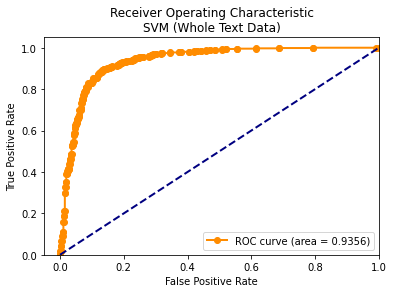

In [129]:
# Check the model performance
print_report(y_validation, svm_whole_pred,fit_time,pred_time)
title = 'SVM (Whole Text Data)'
print_roc(title, y_validation, svm_whole_pred_prob)

Without any hyperparameter tuning, SVM with whole data(text+title) generates a highest ROC. Thus we try some hypertuning based on this model.

#### b. With hyperprameter Tuning

In [130]:
# 这条代码最好不要跑，30分钟起步 --> 实测一个小时
# Determine the best hyperparameters
parameters={'kernel':['linear','rbf','sigmoid','poly'],'C':[0.01,0.05,0.1,0.5,1],'gamma':[0.05,0.1,0.5,1,5]}
svc = SVC()
best_svm = GridSearchCV(svc,parameters,cv=5,scoring='roc_auc') 
best_svm.fit(x_train_whole_vec, y_train)
best_svm.best_params_

{'C': 0.01, 'gamma': 0.05, 'kernel': 'linear'}

In [131]:
 for para, val in list(best_svm.best_params_.items()):    
        print(para, val)    

C 0.01
gamma 0.05
kernel linear


In [132]:
# Fit model with best hyperparameters
start1 = time.time()
svm_whole_best = SVC(kernel='linear', C=0.01, gamma=0.05, probability=True) 
svm_whole_best.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
svm_whole_best_pred = svm_whole_best.predict(x_valid_whole_vec)
svm_whole_best_pred_prob = svm_whole_best.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8876233864844343
Confusion Matrix:
 [[570  91]
 [ 57 599]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       661
           1       0.87      0.91      0.89       656

    accuracy                           0.89      1317
   macro avg       0.89      0.89      0.89      1317
weighted avg       0.89      0.89      0.89      1317

Fit runtime:  23.348848819732666
Prediction runtime:  3.364569902420044
Total runtime:  26.71341872215271
Area under ROC curve is 0.9580458285672115


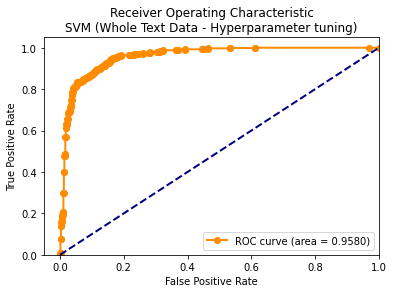

In [133]:
# Check the model performance
print_report(y_validation, svm_whole_best_pred,fit_time,pred_time)
title = 'SVM (Whole Text Data - Hyperparameter tuning)'
print_roc(title, y_validation, svm_whole_best_pred_prob)

Area under ROC curve is 0.8683812405446293


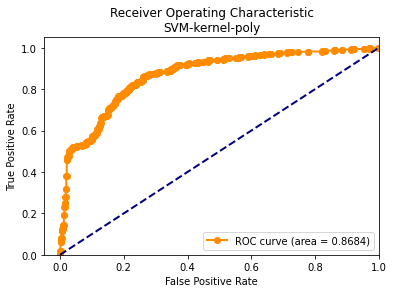

Area under ROC curve is 0.7371672170768606


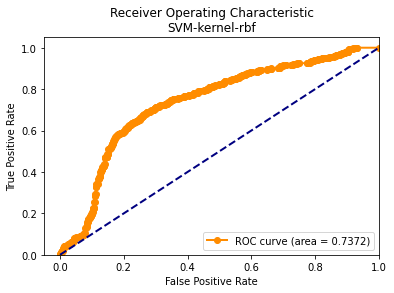

Area under ROC curve is 0.8289027618907051


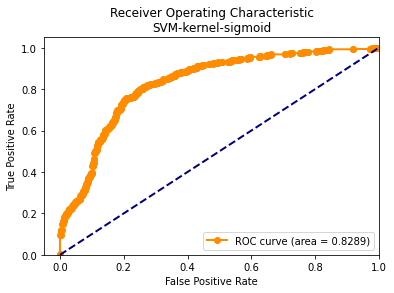

In [134]:
# Check the performance of models with different kernels
for k in ('poly','rbf','sigmoid'):
  best_model_svc4 = SVC(kernel=k, C=0.01, probability=True) 
  best_model_svc4.fit(x_train_whole_vec, y_train)
  best_model_svc_pred=best_model_svc4.predict(x_valid_whole_vec)
  best_model_svc_pred_prob=best_model_svc4.predict_proba(x_valid_whole_vec)
  title='SVM'+'-kernel-'+k
  print_roc(title, y_validation, best_model_svc_pred_prob)

### 2.5.4 Best SVM model

 We choose the model fit with whole data (with hyperparameter turning {kernel='linear', C=0.01, gamma=0.05\}) as the best model under SVM.

## 2.6 KNN

### 2.6.1 Model with the title data

In [135]:
start1 = time.time()
knn_title = KNeighborsClassifier(n_neighbors=1)
knn_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
knn_title_pred = knn_title.predict(x_valid_title_vec)
knn_title_pred_prob=knn_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6249050873196659
Confusion Matrix:
 [[309 352]
 [142 514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       661
           1       0.59      0.78      0.68       656

    accuracy                           0.62      1317
   macro avg       0.64      0.63      0.62      1317
weighted avg       0.64      0.62      0.62      1317

Fit runtime:  0.0029671192169189453
Prediction runtime:  0.2056713104248047
Total runtime:  0.20863842964172363
Area under ROC curve is 0.6255050551640161


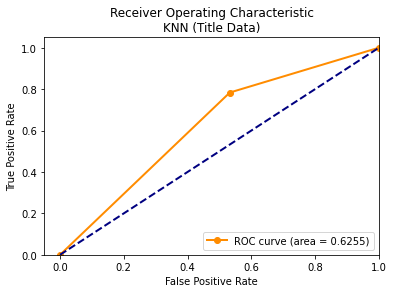

In [136]:
# Check the model performance
print_report(y_validation, knn_title_pred,fit_time,pred_time)
title = 'KNN (Title Data)'
print_roc(title, y_validation, knn_title_pred_prob)

The AUC score is pretty low, therefore we do not need to consider the title data furthermore.

### 2.6.2 Model with the text data

#### a. Fit model with all text features.

In [137]:
start1 = time.time()
knn_text = KNeighborsClassifier(n_neighbors=1)
knn_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
knn_text_pred = knn_text.predict(x_valid_text_vec)
knn_text_pred_prob = knn_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8056188306757783
Confusion Matrix:
 [[550 111]
 [145 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       661
           1       0.82      0.78      0.80       656

    accuracy                           0.81      1317
   macro avg       0.81      0.81      0.81      1317
weighted avg       0.81      0.81      0.81      1317

Fit runtime:  0.0121307373046875
Prediction runtime:  0.8513641357421875
Total runtime:  0.863494873046875
Area under ROC curve is 0.8055180159403711


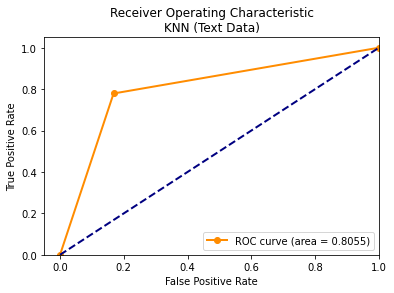

In [138]:
# Check the model performance
print_report(y_validation, knn_text_pred,fit_time,pred_time)
title = 'KNN (Text Data)'
print_roc(title, y_validation, knn_text_pred_prob)

#### b. With hyperprameter Tuning

When k=1, ROC=0.806
When k=2, ROC=0.834
When k=3, ROC=0.831
When k=4, ROC=0.835
When k=5, ROC=0.823
When k=6, ROC=0.817
When k=7, ROC=0.816
When k=8, ROC=0.809
When k=9, ROC=0.803
When k=10, ROC=0.799
When k=11, ROC=0.797
When k=12, ROC=0.791
When k=13, ROC=0.789
When k=14, ROC=0.783


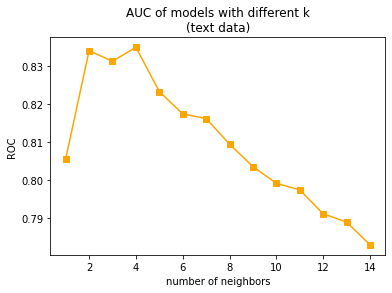

In [139]:
nb=[]
roc=[]
# try all the values of 'k' from 1 to 14
for k in range(1, 15):
    knn_text_new = KNeighborsClassifier(n_neighbors=k)
    knn_text_new.fit(x_train_text_vec, y_train)
    knn_text_pred = knn_text_new.predict(x_valid_text_vec)
    knn_text_pred_prob = knn_text_new.predict_proba(x_valid_text_vec)
    fpr, tpr, thresholds = roc_curve(y_validation, knn_text_pred_prob[:,1], pos_label=1)
    roc_auc=auc(fpr,tpr)
    #accuracy = accuracy_score(y_validation, knn_text_pred, normalize=True, sample_weight=None)
    nb.append(k)
    roc.append(roc_auc)
    print("When k=%d, ROC=%.3f" % (k, roc_auc))  

plt.plot(nb,roc,'s-',color = 'orange',label="ATT-RLSTM")
plt.ylabel('ROC')
plt.xlabel('number of neighbors')
plt.title('AUC of models with different k\n(text data)') 
plt.show()

we can see that k=4 have the largest AUC score. Next we also impletement the feature selection on the text data with k=4 to see if there is further improvement.

In [140]:
# Fit model with best hyperparameters
start1 = time.time()
knn_text_best = KNeighborsClassifier(n_neighbors=4)
knn_text_best.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
knn_text_best_pred = knn_text_best.predict(x_valid_text_vec)
knn_text_best_pred_prob = knn_text_best.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.724373576309795
Confusion Matrix:
 [[575  86]
 [277 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76       661
           1       0.82      0.58      0.68       656

    accuracy                           0.72      1317
   macro avg       0.74      0.72      0.72      1317
weighted avg       0.74      0.72      0.72      1317

Fit runtime:  0.004420280456542969
Prediction runtime:  0.8627116680145264
Total runtime:  0.8671319484710693
Area under ROC curve is 0.8348400428028484


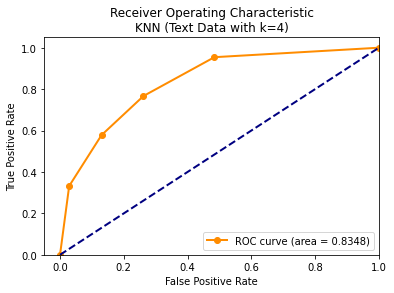

In [141]:
# Check the model performance
print_report(y_validation, knn_text_best_pred,fit_time,pred_time)
title = 'KNN (Text Data with k=4)'
print_roc(title, y_validation, knn_text_best_pred_prob)

#### c. Feature Selection

##### Select k best

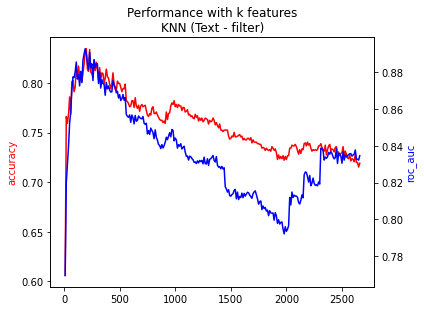

The maximum accuracy is  0.8345 with  200 features.
The maximum roc_auc is  0.8927 with  190 features.


In [142]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'KNN (Text - filter)'
K_determinator("kbest", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, knn_text_best, title)

# The maximum roc_auc is 0.8927 with 190 features.

##### Select from model

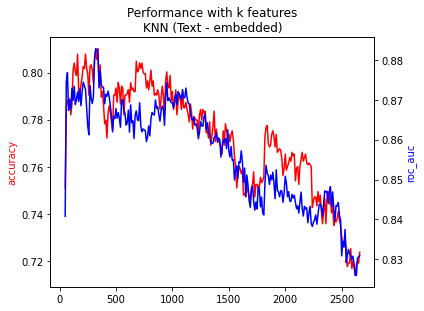

The maximum accuracy is  0.8102 with  340 features.
The maximum roc_auc is  0.8828 with  320 features.


In [143]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'KNN (Text - embedded)'
K_determinator("from_model", x_train_text_vec.shape[1], x_train_text_vec, x_valid_text_vec, y_train, knn_text_best, title)

# The maximum roc_auc is 0.8828 with 320 features.

so we can see that, after do the feature selection, the performance imporved a little bit, then we would combine the title and text data to see further improvement.

### 2.6.3 Model with the whole_text data

#### a. Without hyperprameter Tuning

In [144]:
start1 = time.time()
knn_whole = KNeighborsClassifier(n_neighbors=1)
knn_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
knn_whole_pred=knn_whole.predict(x_valid_whole_vec)
knn_whole_pred_prob=knn_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8101746393318148
Confusion Matrix:
 [[551 110]
 [140 516]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       661
           1       0.82      0.79      0.80       656

    accuracy                           0.81      1317
   macro avg       0.81      0.81      0.81      1317
weighted avg       0.81      0.81      0.81      1317

Fit runtime:  0.0045452117919921875
Prediction runtime:  0.8190350532531738
Total runtime:  0.823580265045166
Area under ROC curve is 0.8100854212021696


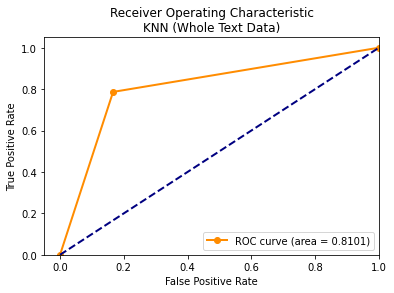

In [145]:
# Check the model performance
print_report(y_validation, knn_whole_pred,fit_time,pred_time)
title = 'KNN (Whole Text Data)'
print_roc(title, y_validation, knn_whole_pred_prob)

The result shows that without hyperprameter tunning, KNN performance on whole data is not better than the previous one, so we would see what if we do the hyperprameter tuning.

#### b. With hyperprameter Tuning

When k=1, ROC=0.810
When k=2, ROC=0.841
When k=3, ROC=0.853
When k=4, ROC=0.845
When k=5, ROC=0.842
When k=6, ROC=0.837
When k=7, ROC=0.833
When k=8, ROC=0.826
When k=9, ROC=0.820
When k=10, ROC=0.812
When k=11, ROC=0.809
When k=12, ROC=0.804
When k=13, ROC=0.799
When k=14, ROC=0.793


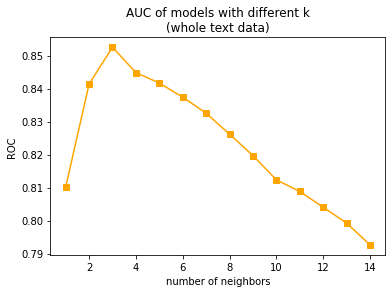

In [146]:
from sklearn.metrics import accuracy_score
nb=[]
roc=[]
# try all the values of 'k' from 1 to 14
for k in range(1, 15):
    knn_whole_new = KNeighborsClassifier(n_neighbors=k)
    knn_whole_new.fit(x_train_whole_vec, y_train)
    knn_whole_pred = knn_whole_new.predict(x_valid_whole_vec)
    knn_whole_pred_prob = knn_whole_new.predict_proba(x_valid_whole_vec)
    fpr, tpr, thresholds = roc_curve(y_validation, knn_whole_pred_prob[:,1], pos_label=1)
    roc_auc=auc(fpr,tpr)
    #accuracy = accuracy_score(y_validation, knn_whole_pred, normalize=True, sample_weight=None)
    nb.append(k)
    roc.append(roc_auc)
    print("When k=%d, ROC=%.3f" % (k, roc_auc))  

plt.plot(nb,roc,'s-',color = 'orange',label="ATT-RLSTM")
plt.ylabel('ROC')
plt.xlabel('number of neighbors')
plt.title('AUC of models with different k\n(whole text data)') 
plt.show()

we can see that k=3 have the largest AUC score, which is even better than the result from "knn_text" with feature selection. Next we also impletement the feature selection on the whole data with k=3 to see if there is further improvement.

In [147]:
# Fit model with best hyperparameters
start1 = time.time()
knn_whole_best = KNeighborsClassifier(n_neighbors=3)
knn_whole_best.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
knn_whole_best_pred = knn_whole_best.predict(x_valid_whole_vec)
knn_whole_best_pred_prob = knn_whole_best.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.7767653758542141
Confusion Matrix:
 [[544 117]
 [177 479]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.79       661
           1       0.80      0.73      0.77       656

    accuracy                           0.78      1317
   macro avg       0.78      0.78      0.78      1317
weighted avg       0.78      0.78      0.78      1317

Fit runtime:  0.0049631595611572266
Prediction runtime:  0.809791088104248
Total runtime:  0.8147542476654053
Area under ROC curve is 0.8525031364156305


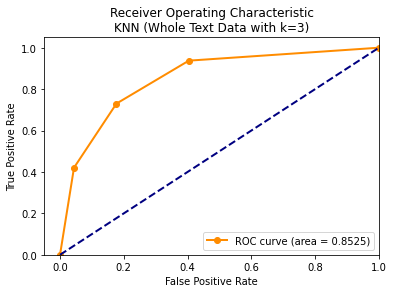

In [148]:
# Check the model performance
print_report(y_validation, knn_whole_best_pred,fit_time,pred_time)
title = 'KNN (Whole Text Data with k=3)'
print_roc(title, y_validation, knn_whole_best_pred_prob)

#### c. Feature Selection

##### Select k best

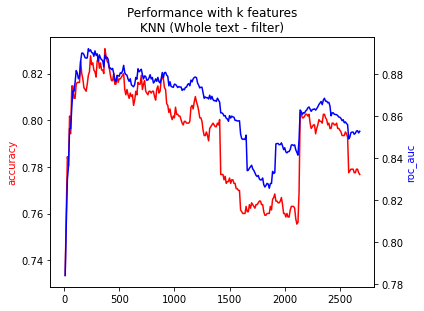

The maximum accuracy is  0.8307 with  370 features.
The maximum roc_auc is  0.8919 with  220 features.


In [149]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'KNN (Whole text - filter)'
K_determinator("kbest", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, knn_whole_best, title)

# The maximum roc_auc is  0.8919 with 220 features.

##### Select from model

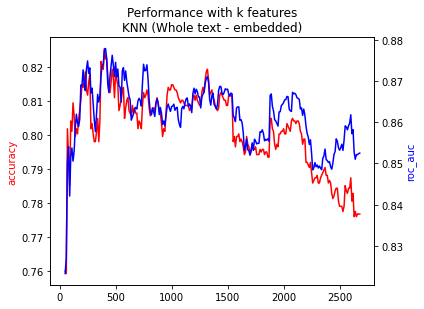

The maximum accuracy is  0.8254 with  400 features.
The maximum roc_auc is  0.8779 with  410 features.


In [150]:
# Check the optimal k for feature selection by the ROC values of validation set.
title = 'KNN (Whole text - embedded)'
K_determinator("from_model", x_train_whole_vec.shape[1], x_train_whole_vec, x_valid_whole_vec, y_train, knn_whole_best, title)

# The maximum roc_auc is  0.8779 with 410 features, not the best one

### 2.6.4 Best KNN model

We choose the model fit with 190 text features (with hyperparameter k=4) as the best model under KNN.

In [151]:
selectkbest = SelectKBest(chi2, k=190)
selectkbest.fit(x_train_text_vec, y_train)
x_train_text_vec_knn = selectkbest.transform(x_train_text_vec)
x_valid_text_vec_knn = selectkbest.transform(x_valid_text_vec)

In [152]:
start1 = time.time()
knn_best = KNeighborsClassifier(n_neighbors=4)
knn_best.fit(x_train_text_vec_knn, y_train)
end1 = time.time()

start2 = time.time()
knn_best_pred = knn_best.predict(x_valid_text_vec_knn)
knn_best_pred_prob = knn_best.predict_proba(x_valid_text_vec_knn)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8314350797266514
Confusion Matrix:
 [[566  95]
 [127 529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       661
           1       0.85      0.81      0.83       656

    accuracy                           0.83      1317
   macro avg       0.83      0.83      0.83      1317
weighted avg       0.83      0.83      0.83      1317

Fit runtime:  0.0015704631805419922
Prediction runtime:  0.4663248062133789
Total runtime:  0.4678952693939209
Area under ROC curve is 0.8926653998007454


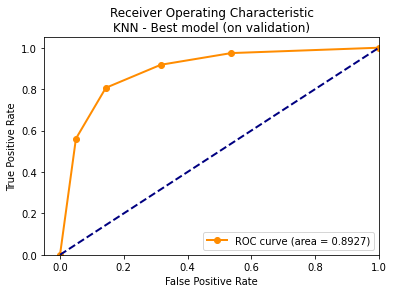

In [153]:
# Check the model performance
print_report(y_validation, knn_best_pred,fit_time,pred_time)
title = 'KNN - Best model (on validation)'
print_roc(title, y_validation, knn_best_pred_prob)

## 2.7 Ensemble Learning

### 2.7.1 Ensemble model with the title data

In [154]:
start1 = time.time()
estimators_title=[('lr', lr_title), ('nb', mnb_title), ('dt', dt_title), ('rf', rf_title), ('svm', svm_title), ('knn', knn_title)]
ensemble_title = VotingClassifier(estimators_title, voting='soft')
ensemble_title.fit(x_train_title_vec, y_train)
end1 = time.time()

start2 = time.time()
ensemble_title_pred = ensemble_title.predict(x_valid_title_vec)
ensemble_title_pred_prob = ensemble_title.predict_proba(x_valid_title_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.6461655277145026
Confusion Matrix:
 [[340 321]
 [145 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       661
           1       0.61      0.78      0.69       656

    accuracy                           0.65      1317
   macro avg       0.66      0.65      0.64      1317
weighted avg       0.66      0.65      0.64      1317

Fit runtime:  6.1099207401275635
Prediction runtime:  0.221343994140625
Total runtime:  6.3312647342681885
Area under ROC curve is 0.702275746282425


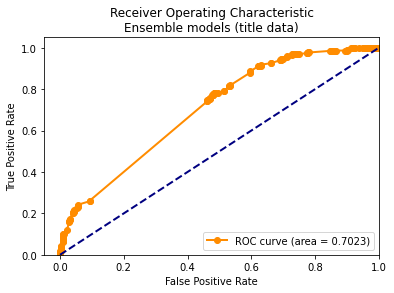

In [155]:
# Check the model performance
print_report(y_validation, ensemble_title_pred, fit_time, pred_time)
title = 'Ensemble models (title data)'
print_roc(title, y_validation, ensemble_title_pred_prob)

### 2.7.2 Ensemble model with the text data

In [156]:
start1 = time.time()
estimators_text=[('nb', mnb_best), ('knn', knn_text_best), ('dt', dt_text_pre)]#, ('lr', lr_best), ('rf', rf_text_best), ('svm', svm_text)]
ensemble_text = VotingClassifier(estimators_text, voting='soft')
ensemble_text.fit(x_train_text_vec, y_train)
end1 = time.time()

start2 = time.time()
ensemble_text_pred = ensemble_text.predict(x_valid_text_vec)
ensemble_text_pred_prob = ensemble_text.predict_proba(x_valid_text_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.873955960516325
Confusion Matrix:
 [[575  86]
 [ 80 576]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       661
           1       0.87      0.88      0.87       656

    accuracy                           0.87      1317
   macro avg       0.87      0.87      0.87      1317
weighted avg       0.87      0.87      0.87      1317

Fit runtime:  0.2387988567352295
Prediction runtime:  0.8370451927185059
Total runtime:  1.0758440494537354
Area under ROC curve is 0.9376925666949559


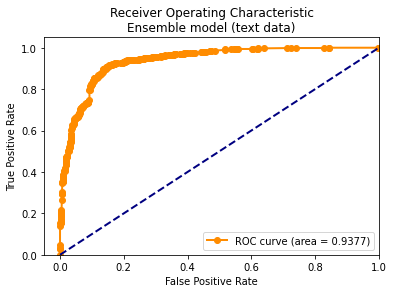

In [157]:
# Check the model performance
print_report(y_validation, ensemble_text_pred, fit_time, pred_time)
title = 'Ensemble model (text data)'
print_roc(title, y_validation, ensemble_text_pred_prob)

### 2.7.3 Ensemble model with the whole_text data

In [158]:
start1 = time.time()
estimators_whole=[('nb', mnb_best), ('knn', knn_whole_best), ('dt', dt_whole_pre)]#, ('lr', lr_best), ('rf', rf_whole_best), ('svm', svm_whole_best)]
ensemble_whole = VotingClassifier(estimators_whole, voting='soft')
ensemble_whole.fit(x_train_whole_vec, y_train)
end1 = time.time()

start2 = time.time()
ensemble_whole_pred = ensemble_whole.predict(x_valid_whole_vec)
ensemble_whole_pred_prob = ensemble_whole.predict_proba(x_valid_whole_vec)
end2 = time.time()

fit_time = end1 - start1
pred_time = end2 - start2

Accuracy: 0.8823082763857252
Confusion Matrix:
 [[573  88]
 [ 67 589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       661
           1       0.87      0.90      0.88       656

    accuracy                           0.88      1317
   macro avg       0.88      0.88      0.88      1317
weighted avg       0.88      0.88      0.88      1317

Fit runtime:  0.24713349342346191
Prediction runtime:  0.8062403202056885
Total runtime:  1.0533738136291504
Area under ROC curve is 0.9462646673554482


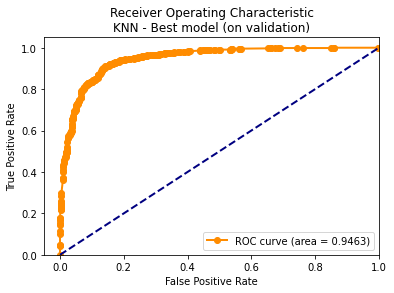

In [159]:
# Check the model performance
print_report(y_validation, ensemble_whole_pred, fit_time, pred_time)
title = 'KNN - Best model (on validation)'
print_roc(title, y_validation, ensemble_whole_pred_prob)

### 2.7.4 Best Ensemble model

We choose the model ensembled Naive Bayes, Decision tree and KNN fit with whole text data as the best model under ensemble learning.

## 2.8 Neural Network


### 2.9.1 Model with the title data

Previously, with Scikit-learn's CountVectorizer, which is used to convert a collection of text documents to a vector of term/token counts, we discard a lot of information about word order and grammar. That is called a bag-of-words approach. This representation is used in conjunction with models that don’t take ordering into account, such as logistic regression, Naive bayes, gradient boosting machines,SVM and KNN.

However, for some text samples, word order is critical to the text’s meaning. For example, the sentences, “I used to hate my commute. My new bike changed that completely” can be understood only when read in order. Neural network such as CNNs/RNNs can infer meaning from the order of words in a sample. For these models, we represent the text as a sequence of tokens, preserving order. Therefore, in order to better suit the frame work, we need to do tokenization and vectorization for sequence models.

In [160]:
from keras.preprocessing.text import Tokenizer
max_features = 3000 # set the maximum Vocabulary Size

tokenizer1 = Tokenizer(num_words=max_features, split=' ')
tokenizer1.fit_on_texts(df['title'].values)
X1 = tokenizer1.texts_to_sequences(df['title'].values)#token sequences

All the neural networks needs to have the inputs that should be in similar shape and size. When we pre-process the texts and use the texts as an inputs for our Model, not all the sequences have the same length, as we can say naturally some of the sequences are long in lengths and some are short. Where we know that we need to have the inputs with the same size, therefore the padding is necessary, however it does not affect the accuracy.

In [161]:
from keras.preprocessing.sequence import pad_sequences
max_length = 100

# Padding: pad_sequences is used to ensure that all sequences in a list have the same length.
X1 = pad_sequences(X1,maxlen = max_length, padding = 'post')

In [162]:
Y1 = pd.get_dummies(df['label']).values#preprocessing the shape of target variable y

In [163]:
x_train_all_1, x_test_1, y_train_all_1, y_test_1 = train_test_split(X1, Y1, test_size=0.33, random_state=101)
x_train_1, x_validation_1, y_train_1, y_validation_1 = train_test_split(x_train_all_1, y_train_all_1, test_size=0.3, random_state=101)

In [164]:
print(x_train_1.shape,x_validation_1.shape,x_test_1.shape)
print(y_train_1.shape,y_validation_1.shape,y_test_1.shape)
#we can see that the mzx length is constarint by 100

(2940, 100) (1260, 100) (2070, 100)
(2940, 2) (1260, 2) (2070, 2)


In [165]:
# define the model: Design Deep Neural Network with Embedding Layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding


model1 = Sequential()
model1.add(Embedding(max_features, 24, input_length=max_length))
model1.add(Flatten())
model1.add(Dense(2, activation='sigmoid'))#(2, activation='softmax')#Binary classification

# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

print(model1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 24)           72000     
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 2)                 4802      
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________
None


In [166]:
from keras.wrappers.scikit_learn import KerasClassifier

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

nn_start_title=time.time()
history1 = model1.fit(x_train_1, y_train_1,validation_data=(x_validation_1, y_validation_1), epochs=100, batch_size=256, verbose=1,callbacks =[earlystopping])
nn_end_title=time.time()

fit_time1=nn_end_title-nn_start_title
print('title_fit time:',fit_time1)

Epoch 1/100
12/12 [==============================] - 1s 34ms/step - loss: 0.6931 - accuracy: 0.5085 - auc: 0.5091 - val_loss: 0.6914 - val_accuracy: 0.5214 - val_auc: 0.5555
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.5241 - auc: 0.6007 - val_loss: 0.6899 - val_accuracy: 0.5754 - val_auc: 0.6275
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.7585 - auc: 0.8261 - val_loss: 0.6865 - val_accuracy: 0.6143 - val_auc: 0.6904
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.6867 - auc: 0.7849 - val_loss: 0.6799 - val_accuracy: 0.6000 - val_auc: 0.6926
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6582 - accuracy: 0.8276 - auc: 0.9109 - val_loss: 0.6707 - val_accuracy: 0.6397 - val_auc: 0.7408
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6368 - accuracy: 0.7660 - auc: 0.8769 - val_loss: 0.6579 

In [167]:
nn_start_pred_1=time.time()
y_pred1 = model1.predict(x_validation_1).ravel()
nn_end_pred_1=time.time()


pred_time_1=nn_end_pred_1-nn_start_pred_1
print(pred_time_1)

0.15237951278686523


In [168]:
# evaluate the model
#valid_loss,valid_accuracy,valid_auc = model2.evaluate(x_validation_2, y_validation_2, verbose=2)
model1.evaluate(x_validation_1, y_validation_1, verbose=0)[2]
print("The auc of the model is:")
print((model1.evaluate(x_validation_1, y_validation_1, verbose=0)[2]))
print("The accuracy of the model is:")
print((model1.evaluate(x_validation_1, y_validation_1, verbose=0)[1]))

The auc of the model is:
0.8763410449028015
The accuracy of the model is:
0.7976190447807312


In [169]:
total_time1=pred_time_1+fit_time1

In [170]:
print(total_time1)

5.22870135307312


### 2.9.2 Model with the text data

In [171]:
max_features = 3000 # set the maximum Vocabulary Size

tokenizer2 = Tokenizer(num_words=max_features, split=' ')
tokenizer2.fit_on_texts(df['text'].values)
X2 = tokenizer2.texts_to_sequences(df['text'].values)#token sequences

In [172]:
max_length = 100

# Padding: pad_sequences is used to ensure that all sequences in a list have the same length.
X2 = pad_sequences(X2,maxlen = max_length, padding = 'post')

In [173]:
Y2 = pd.get_dummies(df['label']).values#preprocessing the shape of target variable y

In [174]:
x_train_all_2, x_test_2, y_train_all_2, y_test_2 = train_test_split(X2, Y2, test_size=0.33, random_state=101)
x_train_2, x_validation_2, y_train_2, y_validation_2 = train_test_split(x_train_all_2, y_train_all_2, test_size=0.3, random_state=101)

In [175]:
# define the model: Design Deep Neural Network with Embedding Layer
model2 = Sequential()
model2.add(Embedding(max_features, 24, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(2, activation='sigmoid'))#(2, activation='softmax')#Binary classification

# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 24)           72000     
                                                                 
 flatten_1 (Flatten)         (None, 2400)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 4802      
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________
None


In [176]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
#avoid overfitting!
nn_start_text=time.time()
history2 = model2.fit(x_train_2, y_train_2,validation_data=(x_validation_2, y_validation_2), epochs=100, batch_size=256, verbose=1,callbacks=[earlystopping])
nn_end_text=time.time()

fit_time2=nn_end_text-nn_start_text
print('text fit time:',fit_time2)

Epoch 1/100
12/12 [==============================] - 1s 33ms/step - loss: 0.6919 - accuracy: 0.5429 - auc: 0.5387 - val_loss: 0.6889 - val_accuracy: 0.6000 - val_auc: 0.6088
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.7837 - auc: 0.8122 - val_loss: 0.6827 - val_accuracy: 0.6484 - val_auc: 0.6913
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6606 - accuracy: 0.8687 - auc: 0.9133 - val_loss: 0.6722 - val_accuracy: 0.7000 - val_auc: 0.7563
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6352 - accuracy: 0.9105 - auc: 0.9523 - val_loss: 0.6539 - val_accuracy: 0.7341 - val_auc: 0.8120
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5967 - accuracy: 0.9384 - auc: 0.9686 - val_loss: 0.6252 - val_accuracy: 0.7817 - val_auc: 0.8576
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5438 - accuracy: 0.9435 - auc: 0.9734 - val_loss: 0.5860

In [177]:
nn_start_pred_2=time.time()
y_pred2 = model2.predict(x_validation_2).ravel()
nn_end_pred_2=time.time()


pred_time_2=nn_end_pred_2-nn_start_pred_2
print(pred_time_2)

0.12110066413879395


In [178]:
# evaluate the model
#valid_loss,valid_accuracy,valid_auc = model2.evaluate(x_validation_2, y_validation_2, verbose=2)
model2.evaluate(x_validation_2, y_validation_2, verbose=0)[2]
print("The auc of the model is:")
print((model2.evaluate(x_validation_2, y_validation_2, verbose=0)[2]))
print("The accuracy of the model is:")
print((model2.evaluate(x_validation_2, y_validation_2, verbose=0)[1]))

The auc of the model is:
0.932293713092804
The accuracy of the model is:
0.8523809313774109


In [179]:
total_time2=pred_time_2+fit_time2

In [180]:
print(total_time2)

4.680157423019409


### 2.9.3 Model with the whole data

In [181]:
max_features = 3000 # Vocabulary Size

tokenizer3 = Tokenizer(num_words=max_features, split=' ')
tokenizer3.fit_on_texts(df['whole_text'].values)
X3 = tokenizer3.texts_to_sequences(df['whole_text'].values)

In [182]:
max_length = 100
# Padding
X3 = pad_sequences(X3,maxlen = max_length, padding = 'post')

In [183]:
Y3 = pd.get_dummies(df['label']).values

In [184]:
x_train_all_3, x_test_3, y_train_all_3, y_test_3 = train_test_split(X3, Y3, test_size=0.33, random_state=101)
x_train_3, x_validation_3, y_train_3, y_validation_3 = train_test_split(x_train_all_3, y_train_all_3, test_size=0.3, random_state=101)

In [185]:
# define the model: Design Deep Neural Network with Embedding Layer
model3 = Sequential()
model3.add(Embedding(max_features, 24, input_length=max_length))
model3.add(Flatten())
model3.add(Dense(2, activation='sigmoid'))#(2, activation='softmax')#Binary classification

# compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

print(model3.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 24)           72000     
                                                                 
 flatten_2 (Flatten)         (None, 2400)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4802      
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________
None


In [186]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  

nn_start_whole=time.time()
#model.fit(x_train_all, y_train_all, epochs=100, verbose=0)
history = model3.fit(x_train_3, y_train_3,validation_data=(x_validation_3, y_validation_3), epochs=100, batch_size=256, verbose=1,callbacks=[earlystopping])
nn_end_whole=time.time()


fit_time3=nn_end_whole-nn_start_whole
print('whole text fit time:',fit_time3)

Epoch 1/100
12/12 [==============================] - 1s 32ms/step - loss: 0.6910 - accuracy: 0.5500 - auc: 0.5567 - val_loss: 0.6888 - val_accuracy: 0.5968 - val_auc: 0.6054
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6765 - accuracy: 0.7942 - auc: 0.8243 - val_loss: 0.6820 - val_accuracy: 0.6500 - val_auc: 0.6943
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6586 - accuracy: 0.8854 - auc: 0.9243 - val_loss: 0.6702 - val_accuracy: 0.6960 - val_auc: 0.7629
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6311 - accuracy: 0.9228 - auc: 0.9571 - val_loss: 0.6492 - val_accuracy: 0.7429 - val_auc: 0.8201
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5896 - accuracy: 0.9323 - auc: 0.9684 - val_loss: 0.6177 - val_accuracy: 0.7778 - val_auc: 0.8602
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5339 - accuracy: 0.9330 - auc: 0.9755 - val_loss: 0.5758 -

In [187]:
nn_start_pred_3=time.time()
y_pred3 = model3.predict(x_validation_3).ravel()
nn_end_pred_3=time.time()


pred_time_3=nn_end_pred_3-nn_start_pred_3
print(pred_time_3)

0.1206963062286377


In [188]:
# evaluate the model
#valid_loss,valid_accuracy,valid_auc = model3.evaluate(x_validation_3, y_validation_3, verbose=2)
model3.evaluate(x_validation_3, y_validation_3, verbose=0)[2]
print("The auc of the model is:")
print((model3.evaluate(x_validation_3, y_validation_3, verbose=0)[2]))
print("The accuracy of the model is:")
print((model3.evaluate(x_validation_3, y_validation_3, verbose=0)[1]))

The auc of the model is:
0.9319145083427429
The accuracy of the model is:
0.8476190567016602


In [189]:
total_time3=pred_time_3+fit_time3

In [190]:
print(total_time3)

4.180171012878418


### 2.9.4 Best NN model (text data)

So the best data set for training is text data, now we would implement the NN on text dataset to see the final test set evaluation, that is, combining the training and validation set to training NN again, and see the performance on test set. 

In [191]:
# define the model: Design Deep Neural Network with Embedding Layer
model_best = Sequential()
model_best.add(Embedding(max_features, 24, input_length=max_length))
model_best.add(Flatten())
model_best.add(Dense(2, activation='sigmoid'))#(2, activation='softmax')#Binary classification

# compile the model
model_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

print(model_best.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 24)           72000     
                                                                 
 flatten_3 (Flatten)         (None, 2400)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4802      
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________
None


In [192]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

nn_start_best=time.time()
history_best = model_best.fit(x_train_all_2, y_train_all_2,validation_data=(x_test_2, y_test_2), epochs=100, batch_size=256, verbose=1,callbacks=[earlystopping])
nn_end_best=time.time()

fit_time_best=nn_end_best-nn_start_best
print('text fit time:',fit_time_best)

Epoch 1/100
17/17 [==============================] - 1s 26ms/step - loss: 0.6902 - accuracy: 0.5562 - auc: 0.5764 - val_loss: 0.6878 - val_accuracy: 0.5981 - val_auc: 0.6116
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6720 - accuracy: 0.7945 - auc: 0.8345 - val_loss: 0.6762 - val_accuracy: 0.6778 - val_auc: 0.7233
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6434 - accuracy: 0.8805 - auc: 0.9226 - val_loss: 0.6484 - val_accuracy: 0.7671 - val_auc: 0.8299
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5908 - accuracy: 0.8955 - auc: 0.9507 - val_loss: 0.5941 - val_accuracy: 0.8072 - val_auc: 0.8857
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5114 - accuracy: 0.9007 - auc: 0.9605 - val_loss: 0.5189 - val_accuracy: 0.8319 - val_auc: 0.9086
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4225 - accuracy: 0.9040 - auc: 0.9653 - val_loss: 0.4480 - 

In [193]:
nn_start_pred_4=time.time()
y_pred4 = model_best.predict(x_test_2).ravel()
nn_end_pred_4=time.time()


pred_time_4=nn_end_pred_4-nn_start_pred_4
print(pred_time_4)

2.323117256164551


In [194]:
# evaluate the model
#valid_loss,valid_accuracy,valid_auc = model2.evaluate(x_validation_2, y_validation_2, verbose=2)
model_best.evaluate(x_test_2, y_test_2, verbose=0)[2]
print("The auc of the model is:")
print((model_best.evaluate(x_test_2, y_test_2, verbose=0)[2]))
print("The accuracy of the model is:")
print((model_best.evaluate(x_test_2, y_test_2, verbose=0)[1]))

The auc of the model is:
0.9487301707267761
The accuracy of the model is:
0.8705313801765442


In [195]:
total_time4=pred_time_4+fit_time_best

In [196]:
print(total_time4)

6.987454891204834


# PART 3. Model Evaluation

In [197]:
acc_score = []
prec_score = []
reca_score = []
roc_auc = []

def storage_valuation(y, y_pred_class, y_pred_prob):
  acc_score.append(round(accuracy_score(y, y_pred_class),4))
  prec_score.append(round(precision_score(y, y_pred_class),4))
  reca_score.append(round(recall_score(y, y_pred_class),4))
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)
  roc_auc.append(round(auc(fpr,tpr),4))

## 3.1 Best model of each algorithm

### 3.1.1 Best Logistic Regression Model

Based on the AUROC values of LR models, we select the best Linear Regression model (1550 text features selected by embedded method) to make prediction on test set.

In [198]:
# Fit model with 1550 selected text features using SelectFromModel, combining train set and validation set
lr.fit(x_train_all_text_vec, y_train_all)
lr.coef_
selector = SelectFromModel(lr, prefit=True,max_features=1550,threshold=-np.inf)
x_train_all_text_vec_lr = selector.transform(x_train_all_text_vec)
x_test_text_vec_lr = selector.transform(x_test_text_vec)
x_train_all_text_vec_lr.shape

(4389, 1550)

In [199]:
start1 = time.time()
lr_best = LogisticRegression()
lr_best.fit(x_train_all_text_vec_lr, y_train_all)
end1 = time.time()

start2 = time.time()
lr_best_pred = lr_best.predict(x_test_text_vec_lr)
lr_best_pred_prob = lr_best.predict_proba(x_test_text_vec_lr)
end2 = time.time()

fit_time_lr = round(end1 - start1,4)
pred_time_lr = round(end2 - start2,4)

Accuracy: 0.9064327485380117
Confusion Matrix:
 [[826  94]
 [ 82 879]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       920
           1       0.90      0.91      0.91       961

    accuracy                           0.91      1881
   macro avg       0.91      0.91      0.91      1881
weighted avg       0.91      0.91      0.91      1881

Fit runtime:  0.2451
Prediction runtime:  0.0022
Total runtime:  0.24730000000000002
Area under ROC curve is 0.958048681174501


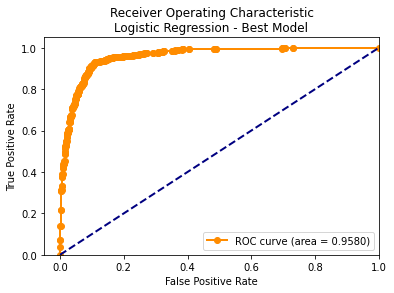

In [200]:
# Check the model performance
storage_valuation(y_test, lr_best_pred, lr_best_pred_prob)
print_report(y_test, lr_best_pred, fit_time_lr, pred_time_lr)
title = 'Logistic Regression - Best Model'
print_roc(title, y_test, lr_best_pred_prob)

In [201]:
# Empirical log probability of features given label = 1 (Fake news)

coeff_lr = pd.DataFrame(lr_best.coef_.transpose(), [vectorizer_all_text.get_feature_names()[i] for i in selector.get_support(indices=True)], columns = ['Log Probability'])  
coeff_lr = coeff_lr.sort_values(by=['Log Probability'], ascending=False)
coeff_lr['Rank_lr'] = coeff_lr['Log Probability'].rank(ascending=False)

In [202]:
# display the most informative features (indicate Fake news)
coeff_lr.head(20)

Log Probability  Rank_lr
2016                     1.785552      1.0
comments                 1.295225      2.0
article                  1.188182      3.0
establishment            1.142969      4.0
october                  1.002294      5.0
28                       0.898264      6.0
source                   0.882474      7.0
uk                       0.874108      8.0
share                    0.870768      9.0
corporate                0.844519     10.0
democratic party         0.838877     11.0
november 2016            0.833321     12.0
researcher               0.814638     13.0
oct                      0.805123     14.0
print                    0.786837     15.0
illegal                  0.766795     16.0
hillary clinton          0.760986     17.0
ago                      0.754499     18.0
com                      0.752060     19.0
trump win                0.741671     20.0

### 3.1.2 Best Naive Bayes Classifier Model

Based on the AUROC values of all NB models, we select the best Naive Bayes Classifier model (110 whole_text features selected by embedded method) to make prediction on test set.

In [203]:
# Fit model with 110 selected whole text features using SelectFromModel, combining train set and validation set
lr = LogisticRegression()
lr.fit(x_train_all_whole_vec, y_train_all)
lr.coef_
selector = SelectFromModel(lr, prefit=True,max_features=110,threshold=-np.inf)
x_train_all_whole_vec_NB = selector.transform(x_train_all_whole_vec)
x_test_whole_vec_NB = selector.transform(x_test_whole_vec)
x_train_all_whole_vec_NB.shape

(4389, 110)

In [204]:
#train the model using combined train and validation set
start1 = time.time()
mnb_best = MultinomialNB()
mnb_best.fit(x_train_all_whole_vec_NB, y_train_all)
end1 = time.time()

start2 = time.time()
mnb_best_pred = mnb_best.predict(x_test_whole_vec_NB)
mnb_best_pred_prob = mnb_best.predict_proba(x_test_whole_vec_NB)
end2 = time.time()

fit_time_nb = round(end1 - start1,4)
pred_time_nb = round(end2 - start2,4)

Accuracy: 0.8442317916002127
Confusion Matrix:
 [[750 170]
 [123 838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       920
           1       0.83      0.87      0.85       961

    accuracy                           0.84      1881
   macro avg       0.85      0.84      0.84      1881
weighted avg       0.84      0.84      0.84      1881

Fit runtime:  0.005
Prediction runtime:  0.0018
Total runtime:  0.0068000000000000005
Area under ROC curve is 0.9193378726869657


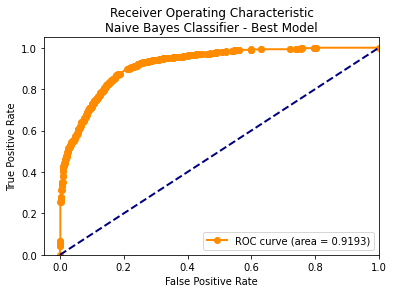

In [205]:
# Check the model performance
storage_valuation(y_test, mnb_best_pred, mnb_best_pred_prob)
print_report(y_test, mnb_best_pred,fit_time_nb,pred_time_nb)
title = 'Naive Bayes Classifier - Best Model'
print_roc(title, y_test, mnb_best_pred_prob)

In [206]:
# Empirical log probability of features given a class 1 (fake)
coeff_nb = pd.DataFrame(mnb_best.feature_log_prob_[1,:].flatten(), [vectorizer_whole.get_feature_names_out()[i] for i in selector.get_support(indices=True)], columns = ['Log Probability'])  
coeff_nb = coeff_nb.sort_values(by=['Log Probability'], ascending=False)
coeff_nb['Rank_NB'] = coeff_nb['Log Probability'].rank(ascending=False)

In [207]:
# display the most informative features (indicate fake)
coeff_nb[['Rank_NB']].head(20)

Rank_NB
washington                1.0
2016                      2.0
column                    3.0
offer                     4.0
canada                    5.0
speaking                  6.0
violent                   7.0
short                     8.0
obama administration      9.0
arrest                   10.0
addition                 11.0
wind                     12.0
september                13.0
hear                     14.0
ago                      15.0
wealth                   16.0
indicate                 17.0
concede                  18.0
et                       19.0
survey                   20.0

### 3.1.3 Best Decision Tree Classifier Model

Based on the AUROC values of DT models, we select the best Decision Tree model (whole text data with 6 max depth) to make prediction on test set.

In [208]:
start1 = time.time()
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt_best.fit(x_train_all_whole_vec, y_train_all)
end1 = time.time()

start2 = time.time()
dt_best_pred = dt_best.predict(x_test_whole_vec)
dt_best_pred_prob = dt_best.predict_proba(x_test_whole_vec)
end2 = time.time()

fit_time_dt = round(end1 - start1,4)
pred_time_dt = round(end2 - start2,4)

Accuracy: 0.8149920255183413
Confusion Matrix:
 [[725 195]
 [153 808]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       920
           1       0.81      0.84      0.82       961

    accuracy                           0.81      1881
   macro avg       0.82      0.81      0.81      1881
weighted avg       0.82      0.81      0.81      1881

Fit runtime:  0.3578
Prediction runtime:  0.0053
Total runtime:  0.36310000000000003
Area under ROC curve is 0.8645330950549699


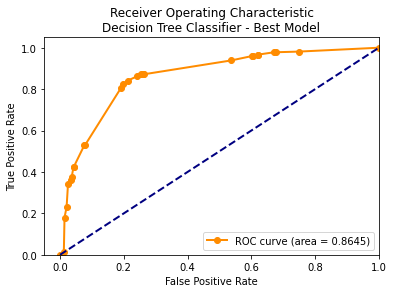

In [209]:
# Check the model performance
storage_valuation(y_test, dt_best_pred, dt_best_pred_prob)
print_report(y_test,dt_best_pred, fit_time_dt, pred_time_dt)
title = 'Decision Tree Classifier - Best Model'
print_roc(title, y_test, dt_best_pred_prob)

In [210]:
# display the most informative features (indicate fake)
importance = dt_best.feature_importances_

features = []
importance_score = []
for i,v in enumerate(importance):
    features.append(vectorizer_all_whole.get_feature_names()[i])
    importance_score.append(v)
coeff_dt = pd.DataFrame(importance_score, features, columns = ['Importance Score'])
coeff_dt = coeff_dt.sort_values(by=['Importance Score'], ascending=False)
coeff_dt['Rank_DT'] = coeff_dt['Importance Score'].rank(ascending=False)

In [211]:
coeff_dt[['Rank_DT']].head(20)  #top 38 are informative

Rank_DT
say             1.0
gop             2.0
2016            3.0
october         4.0
article         5.0
hillary         6.0
obama           7.0
nomination      8.0
republican      9.0
didn           10.0
rubio          11.0
november       12.0
com            13.0
trump          14.0
print          15.0
email          16.0
ted            17.0
nominee        18.0
2012           19.0
house          20.0

In [212]:
# Generate decision tree plot
dot_data = tree.export_graphviz(dt_best,out_file=None, 
                                feature_names=vectorizer_all_whole.get_feature_names(),  
                                class_names=['Real','Fake'],
                                filled = True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("tree_best") 

'tree_best.pdf'

### 3.1.4 Best Random Forest Model

Based on the AUROC values of RF models, we select the best Random Forest model (text data) to make prediction on test set.

In [213]:
start1 = time.time()
rf_best = RandomForestClassifier(random_state=0)
rf_best.fit(x_train_all_text_vec, y_train_all)
end1 = time.time()

start2 = time.time()
rf_best_pred = rf_best.predict(x_test_text_vec)
rf_best_pred_prob = rf_best.predict_proba(x_test_text_vec)
end2 = time.time()

fit_time_rf = round(end1 - start1,4)
pred_time_rf = round(end2 - start2,4)

Accuracy: 0.9149388623072834
Confusion Matrix:
 [[851  69]
 [ 91 870]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       920
           1       0.93      0.91      0.92       961

    accuracy                           0.91      1881
   macro avg       0.91      0.92      0.91      1881
weighted avg       0.92      0.91      0.91      1881

Fit runtime:  4.9665
Prediction runtime:  0.2209
Total runtime:  5.1874
Area under ROC curve is 0.9736336696376057


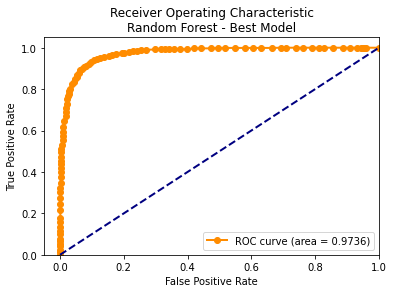

In [214]:
# Check the model performance
storage_valuation(y_test, rf_best_pred, rf_best_pred_prob)
print_report(y_test, rf_best_pred, fit_time_rf, pred_time_rf)
title = 'Random Forest - Best Model'
print_roc(title, y_test,rf_best_pred_prob)

### 3.1.5 Best SVM Model

Based on the AUROC values of SVM models, we select the best SVM model (with hyperparameter {kernel='linear', C=0.01, gamma=0.05\}) to make prediction on test set.

In [215]:
start1 = time.time()
svm_best = SVC(kernel='linear', C=0.01, gamma=0.05, probability=True) 
svm_best.fit(x_train_all_whole_vec, y_train_all)
end1 = time.time()

start2 = time.time()
svm_best_pred = svm_best.predict(x_test_whole_vec)
svm_best_pred_prob = svm_best.predict_proba(x_test_whole_vec)
end2 = time.time()

fit_time_svm = round(end1 - start1,4)
pred_time_svm = round(end2 - start2,4)

Accuracy: 0.9064327485380117
Confusion Matrix:
 [[812 108]
 [ 68 893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       920
           1       0.89      0.93      0.91       961

    accuracy                           0.91      1881
   macro avg       0.91      0.91      0.91      1881
weighted avg       0.91      0.91      0.91      1881

Fit runtime:  42.8383
Prediction runtime:  6.4172
Total runtime:  49.2555
Area under ROC curve is 0.9655584083608559


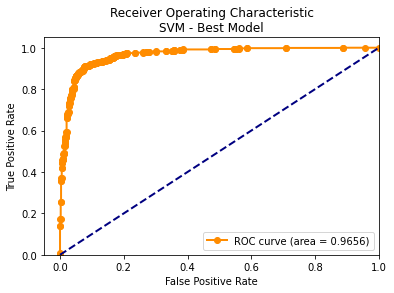

In [216]:
# Check the model performance
storage_valuation(y_test, svm_best_pred, svm_best_pred_prob)
print_report(y_test, svm_best_pred, fit_time_svm, pred_time_svm)
title = 'SVM - Best Model'
print_roc(title, y_test, svm_best_pred_prob)

### 3.1.6 Best KNN Model

Based on the AUROC values of KNN models, we select the best KNN model (190 text features selected by filter method, with k=4) to make prediction on test set.

In [217]:
# Fit model with 190 selected text features using Selectkbest, combining train set and validation set
selectkbest = SelectKBest(chi2, k=190)
selectkbest.fit(x_train_all_text_vec, y_train_all)
x_train_all_text_vec_knn = selectkbest.transform(x_train_all_text_vec)
x_test_text_vec_knn = selectkbest.transform(x_test_text_vec)
x_train_all_text_vec_knn.shape

(4389, 190)

In [218]:
start1 = time.time()
knn_best = KNeighborsClassifier(n_neighbors=4)
knn_best.fit(x_train_all_text_vec_knn, y_train_all)
end1 = time.time()

start2 = time.time()
knn_best_pred = knn_best.predict(x_test_text_vec_knn)
knn_best_pred_prob = knn_best.predict_proba(x_test_text_vec_knn)
end2 = time.time()

fit_time_knn = round(end1 - start1,4)
pred_time_knn = round(end2 - start2,4)

Accuracy: 0.8240297713981924
Confusion Matrix:
 [[752 168]
 [163 798]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       920
           1       0.83      0.83      0.83       961

    accuracy                           0.82      1881
   macro avg       0.82      0.82      0.82      1881
weighted avg       0.82      0.82      0.82      1881

Fit runtime:  0.0016
Prediction runtime:  1.2228
Total runtime:  1.2244000000000002
Area under ROC curve is 0.8907603040311269


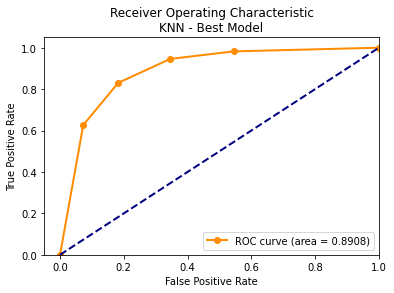

In [219]:
# Check the model performance
storage_valuation(y_test, knn_best_pred, knn_best_pred_prob)
print_report(y_test, knn_best_pred, fit_time_knn, pred_time_knn)
title = 'KNN - Best Model'
print_roc(title, y_test, knn_best_pred_prob)

### 3.1.7 Best Ensemble Learning Model

In [220]:
start1 = time.time()
ensemble_best = VotingClassifier(estimators_whole, voting='soft')
ensemble_best.fit(x_train_all_whole_vec, y_train_all)
end1 = time.time()

start2 = time.time()
ensemble_best_pred = ensemble_best.predict(x_test_whole_vec)
ensemble_best_pred_prob = ensemble_best.predict_proba(x_test_whole_vec)
end2 = time.time()

fit_time_ensemble = round(end1 - start1,4)
pred_time_ensemble = round(end2 - start2,4)

Accuracy: 0.8819776714513556
Confusion Matrix:
 [[792 128]
 [ 94 867]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       920
           1       0.87      0.90      0.89       961

    accuracy                           0.88      1881
   macro avg       0.88      0.88      0.88      1881
weighted avg       0.88      0.88      0.88      1881

Fit runtime:  0.3749
Prediction runtime:  1.77
Total runtime:  2.1449
Area under ROC curve is 0.9488123784101705


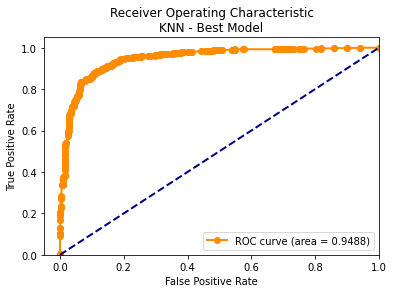

In [221]:
# Check the model performance
storage_valuation(y_test, ensemble_best_pred, ensemble_best_pred_prob)
print_report(y_test, ensemble_best_pred, fit_time_ensemble, pred_time_ensemble)
title = 'KNN - Best Model'
print_roc(title, y_test, ensemble_best_pred_prob)

### 3.1.8 Best NN model (text data)

So the best data set for training is text data, now we would implement the NN on text dataset to see the final test set evaluation, that is, combining the training and validation set to training NN again, and see the performance on test set. 

In [222]:
# define the model: Design Deep Neural Network with Embedding Layer
model_best = Sequential()
model_best.add(Embedding(max_features, 24, input_length=max_length))
model_best.add(Flatten())
model_best.add(Dense(2, activation='sigmoid'))#(2, activation='softmax')#Binary classification

# compile the model
model_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

print(model_best.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 24)           72000     
                                                                 
 flatten_4 (Flatten)         (None, 2400)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 4802      
                                                                 
Total params: 76,802
Trainable params: 76,802
Non-trainable params: 0
_________________________________________________________________
None


In [223]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

nn_start_best=time.time()
history_best = model_best.fit(x_train_all_2, y_train_all_2,validation_data=(x_test_2, y_test_2), epochs=100, batch_size=256, verbose=1,callbacks=[earlystopping])
nn_end_best=time.time()

fit_time_best=nn_end_best-nn_start_best
print('text fit time:',fit_time_best)

Epoch 1/100
17/17 [==============================] - 1s 24ms/step - loss: 0.6900 - accuracy: 0.5705 - auc: 0.5761 - val_loss: 0.6860 - val_accuracy: 0.6271 - val_auc: 0.6432
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6712 - accuracy: 0.8119 - auc: 0.8366 - val_loss: 0.6725 - val_accuracy: 0.7251 - val_auc: 0.7635
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6411 - accuracy: 0.8833 - auc: 0.9213 - val_loss: 0.6416 - val_accuracy: 0.7879 - val_auc: 0.8598
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5862 - accuracy: 0.9040 - auc: 0.9571 - val_loss: 0.5849 - val_accuracy: 0.8314 - val_auc: 0.9061
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5069 - accuracy: 0.9079 - auc: 0.9608 - val_loss: 0.5105 - val_accuracy: 0.8372 - val_auc: 0.9189
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.4194 - accuracy: 0.9114 - auc: 0.9689 - val_loss: 0.4410 - 

In [224]:
nn_start_pred_4=time.time()
y_pred4 = model_best.predict(x_test_2).ravel()
nn_end_pred_4=time.time()


pred_time_4=nn_end_pred_4-nn_start_pred_4
print(pred_time_4)

1.9039747714996338


In [225]:
# evaluate the model
#valid_loss,valid_accuracy,valid_auc = model2.evaluate(x_validation_2, y_validation_2, verbose=2)
model_best.evaluate(x_test_2, y_test_2, verbose=0)[2]
print("The auc of the model is:")
print((model_best.evaluate(x_test_2, y_test_2, verbose=0)[2]))
print("The accuracy of the model is:")
print((model_best.evaluate(x_test_2, y_test_2, verbose=0)[1]))

The auc of the model is:
0.9494386315345764
The accuracy of the model is:
0.8724637627601624


In [226]:
total_time4=pred_time_4+fit_time_best

In [227]:
print(total_time4)

6.055825710296631


## 3.2 Comparison

In [228]:
method = ['LR','NB','DT','RF','SVM','KNN','Ensemble']
fit_time = [fit_time_lr, fit_time_nb, fit_time_dt, fit_time_rf, fit_time_svm, fit_time_knn, fit_time_ensemble]
pred_time = [pred_time_lr, pred_time_nb, pred_time_dt, pred_time_rf, pred_time_svm, pred_time_knn, pred_time_ensemble]

df = list(zip(acc_score, prec_score, reca_score, roc_auc, fit_time, pred_time))
comparison_df = pd.DataFrame(df, index = method)
comparison_df.columns = ['Accuracy', 'Precision', 'Recall', 'AUC_ROC', 'Fit time', 'Prediction time']
comparison_df

Accuracy  Precision  Recall  AUC_ROC  Fit time  Prediction time
LR          0.9064     0.9034  0.9147   0.9580    0.2451           0.0022
NB          0.8442     0.8313  0.8720   0.9193    0.0050           0.0018
DT          0.8150     0.8056  0.8408   0.8645    0.3578           0.0053
RF          0.9149     0.9265  0.9053   0.9736    4.9665           0.2209
SVM         0.9064     0.8921  0.9292   0.9656   42.8383           6.4172
KNN         0.8240     0.8261  0.8304   0.8908    0.0016           1.2228
Ensemble    0.8820     0.8714  0.9022   0.9488    0.3749           1.7700

In [229]:
## Generate radar map for visual comparison
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

title_list = ["Logistic Regression", "Naive Bayesian", "Decision Tree", "Random Forest", "SVM", "KNN", "Neural Network", "Ensemble Learning"]
scores_list = [[4.8, 5, 5, 4, 5], [4, 5, 5, 3, 4], [3, 4.8, 2, 4, 5], [5, 4.5, 5, 4.5, 1], [4.8, 1, 3, 4.8, 2], [3.6, 3, 2, 3.5, 2], [5, 1, 4, 5, 0], [4.5, 3, 4, 4.5, 1]]
## The socres of each algorithm are estimated based on their performance above and their natures for hyperparameters and dataset.

fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}]*4]*2)

for m in range(1, 3):
    for n in range(1, 5):
        fig.add_trace(go.Scatterpolar(
      name = title_list[(m-1)*4+n-1],
      r = scores_list[(m-1)*4+n-1],
      theta = ["Accuracy","Efficiency","Stability", "Scalability", "Interpretability"],
    ), m, n)

fig.update_traces(fill = "toself")
fig.update_layout(autosize = False, width = 2000, height = 800)
fig.update_layout(polar1 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar2 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar3 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar4 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar5 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar6 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar7 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)),
                 polar8 = dict(radialaxis_tickangle = 0, angularaxis = dict(direction = "clockwise", period = 5)))

fig.show()
fig.write_html("Radar Map.html")

In [230]:
## Display the top 20 informative words for Logistic Regression, Naive Bayes and Decision Tree Classifier
top_informative_words = pd.DataFrame(index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
top_informative_words["Logistic Regression"] = coeff_lr.index[:20]
top_informative_words["Naive Bayes Classifier"] = coeff_nb.index[:20]
top_informative_words["Decision Tree Classifier"] = coeff_dt.index[:20]

top_informative_words

Logistic Regression Naive Bayes Classifier Decision Tree Classifier
1                 2016             washington                      say
2             comments                   2016                      gop
3              article                 column                     2016
4        establishment                  offer                  october
5              october                 canada                  article
6                   28               speaking                  hillary
7               source                violent                    obama
8                   uk                  short               nomination
9                share   obama administration               republican
10           corporate                 arrest                     didn
11    democratic party               addition                    rubio
12       november 2016                   wind                 november
13          researcher              september                      com
14                 oct                   hear                    trump
15               print                    ago                    print
16             illegal                 wealth                    email
17     hillary clinton               indicate                      ted
18                 ago                concede                  nominee
19                 com                     et                     2012
20           trump win                 survey                    house